In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from core.search import search_trail, search_sole , trial_plot , gens_plot , trial3k_plot, search_trail3k, trial5k_plot, search_trail5k

from core.utils import create_config

# utilization function to print interesting value for writing the report
def print_stat(df1,df2):
    print("Burma:")
    print(f"best fitness : {df1.Best_fitness.max()}")
    print(f"avg fitness : {df1.Best_fitness.mean()} \n +/- {df1.Best_fitness.std()}")
    print(f'best time {df1.Time.min()}')
    print(f"time mean: {df1.Time.mean()} \n +/- {df1.Time.std()}")
    print("Brazil:")
    print(f"best fitness : {df2.Best_fitness.max()}")
    print(f"avg fitness : {df2.Best_fitness.mean()} \n +/- {df2.Best_fitness.std()}")
    print(f'best time {df2.Time.min()}')
    print(f"time : {df2.Time.mean()} \n +/- {df2.Time.std()}")
    
# baselinemodel
functions_data = {
    "crossover_fn": "ordered_crossover", # point_crossover, partialmap_crossover, ordered_crossover
    "mutate_fn": "inversion", #mutate(1swap), inversion, scramble, mutli_mutate
    "replace_fn": "replace_weakest",
}

parameters_data = {
    "max_generations": 3000,
    "population_size": 100,
    "tournament_size": 10,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}


cfg = create_config(
    name="test_params",
    path="./data/burma14.xml", 
    file_name="burma_params",
    num_trial=20, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

cfg2 = create_config(
    name="test_params",
    path="./data/brazil58.xml", 
    file_name="burma_params",
    num_trial=20, # ignored by Sole_Exp, used by search_trial
    parameters=parameters_data, 
    functions=functions_data)
# helper function to search and collect information from single trial data and multiple trial data
# must specify 1000 max generation
def search1k(fn_cfg,pm_cfg,n_trial):
    cfg = create_config(
    name="test_params",
    path="./data/burma14.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp
    parameters=pm_cfg, 
    functions=fn_cfg)

    cfg2 = create_config(
    name="test_params",
    path="./data/brazil58.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp, used by search_trial
    parameters=pm_cfg, 
    functions=fn_cfg)

    df =search_trail(cfg)
    df2 =search_trail(cfg2)

    gf = search_sole(cfg)
    gf2 = search_sole(cfg2)

    return df , df2 , gf , gf2


# must specify 3000 generation in paramater config
def search3k(fn_cfg,pm_cfg,n_trial):
    cfg = create_config(
    name="test_params",
    path="./data/burma14.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp
    parameters=pm_cfg, 
    functions=fn_cfg)

    cfg2 = create_config(
    name="test_params",
    path="./data/brazil58.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp, used by search_trial
    parameters=pm_cfg, 
    functions=fn_cfg)

    df =search_trail3k(cfg)
    df2 =search_trail3k(cfg2)

    gf = search_sole(cfg)
    gf2 = search_sole(cfg2)

    return df , df2 , gf , gf2

# must specify 5000 generation in paramater config
def search5k(fn_cfg,pm_cfg,n_trial):
    cfg = create_config(
    name="test_params",
    path="./data/burma14.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp
    parameters=pm_cfg, 
    functions=fn_cfg)

    cfg2 = create_config(
    name="test_params",
    path="./data/brazil58.xml", 
    file_name="burma_params",
    num_trial=n_trial, # ignored by Sole_Exp, used by search_trial
    parameters=pm_cfg, 
    functions=fn_cfg)

    df =search_trail5k(cfg)
    df2 =search_trail5k(cfg2)

    gf = search_sole(cfg)
    gf2 = search_sole(cfg2)

    return df , df2 , gf , gf2

def m_plot1k(tuple_df):
    gens_plot(tuple_df[2])
    gens_plot(tuple_df[3])
    trial_plot(tuple_df[0])
    trial_plot(tuple_df[1])

def m_plot(tuple_df):
    gens_plot(tuple_df[2])
    gens_plot(tuple_df[3])
    trial3k_plot(tuple_df[0])
    trial3k_plot(tuple_df[1])

def m_plot5k(tuple_df):
    gens_plot(tuple_df[2])
    gens_plot(tuple_df[3])
    trial5k_plot(tuple_df[0])
    trial5k_plot(tuple_df[1])


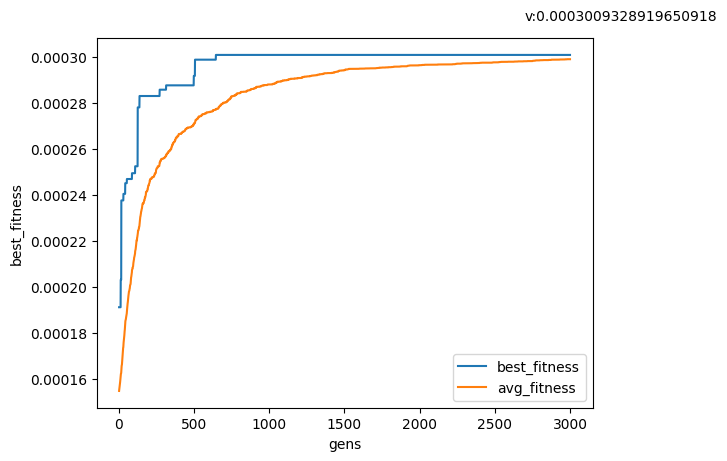

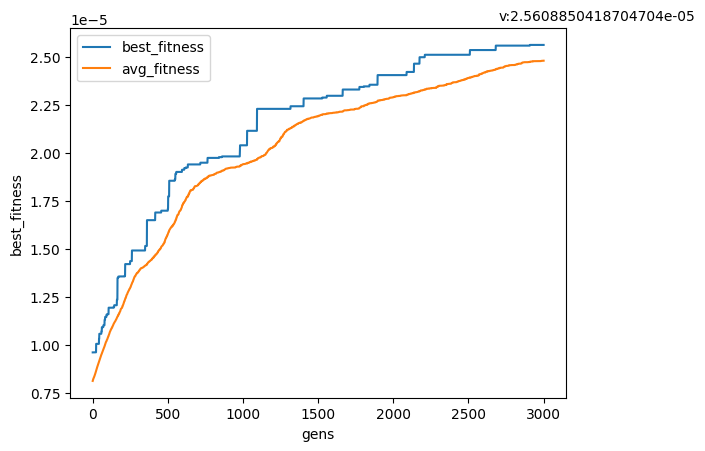

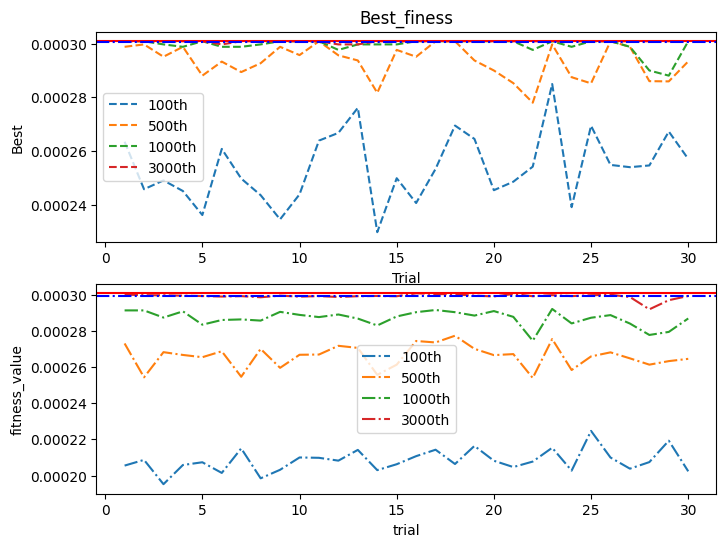

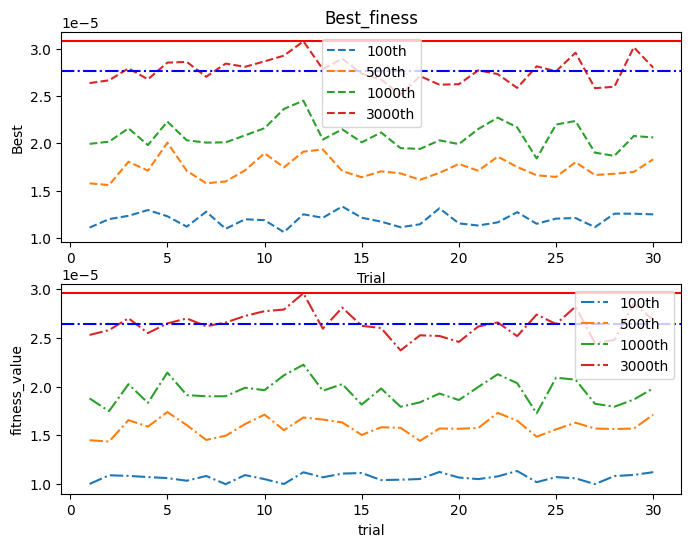

In [2]:
res1 = search3k(functions_data,parameters_data,30)
gens_plot(res1[2])
gens_plot(res1[3])
trial3k_plot(res1[0])
trial3k_plot(res1[1])

In [4]:
print_stat(res1[0],res1[1])

Burma:
best fitness : 0.0003009328919650918
avg fitness : 0.00030081562195323497 
 +/- 3.578243179920596e-07
best time 0.8920350074768066
time mean: 0.9347672462463379 
 +/- 0.029550540930772667
Brazil:
best fitness : 3.0786281632904375e-05
avg fitness : 2.7628933286407833e-05 
 +/- 1.3515626581238421e-06
best time 1.8720033168792725
time : 1.9550299962361655 
 +/- 0.05326983747156793


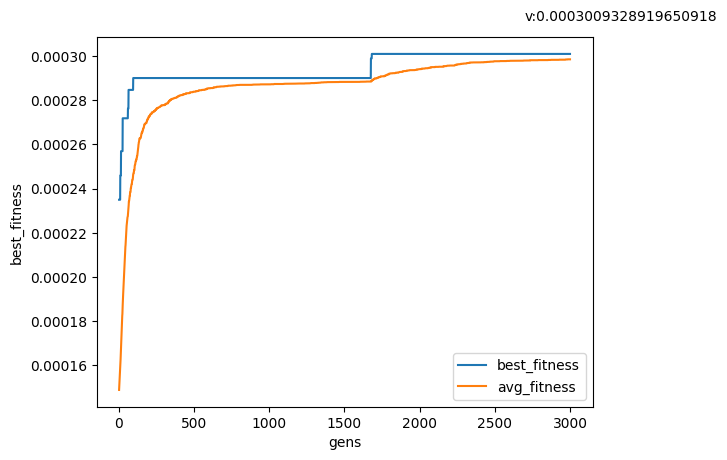

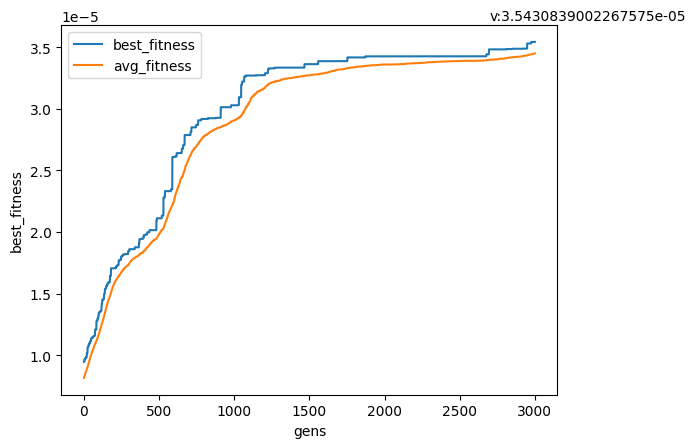

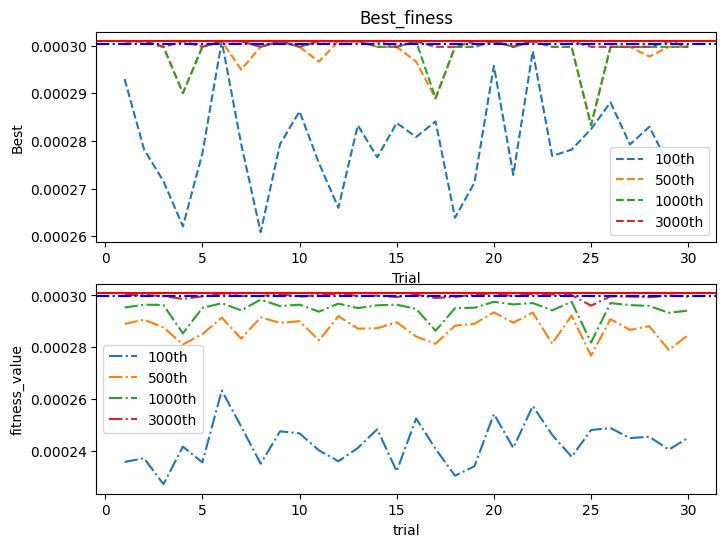

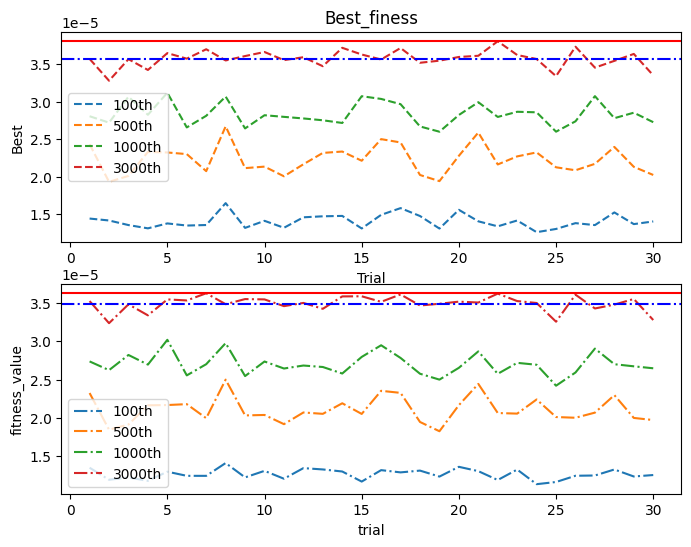

In [3]:
parameters_data = {
    "max_generations": 3000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res2 = search3k(functions_data,parameters_data,30)
m_plot(res2)

In [5]:
print_stat(res2[0],res2[1])

Burma:
best fitness : 0.0003009328919650918
avg fitness : 0.0003004247219137119 
 +/- 5.910489900813684e-07
best time 2.284088134765625
time mean: 2.642070277531942 
 +/- 0.33107857977136385
Brazil:
best fitness : 3.806333739342265e-05
avg fitness : 3.572485107262838e-05 
 +/- 1.1831611303947965e-06
best time 3.4560129642486572
time : 4.1695103963216145 
 +/- 0.6759064952917008


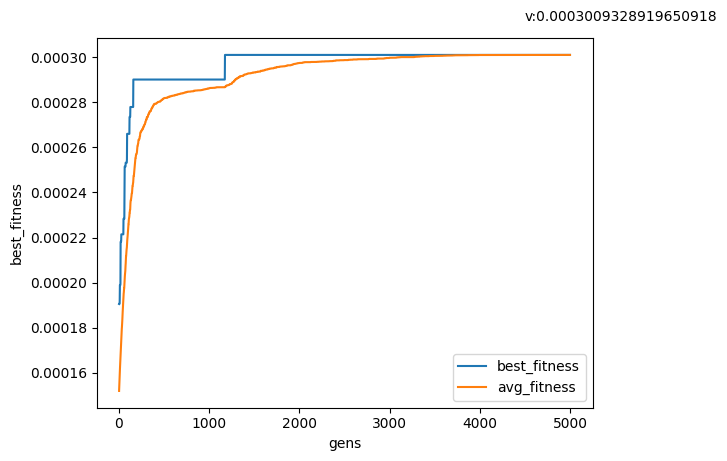

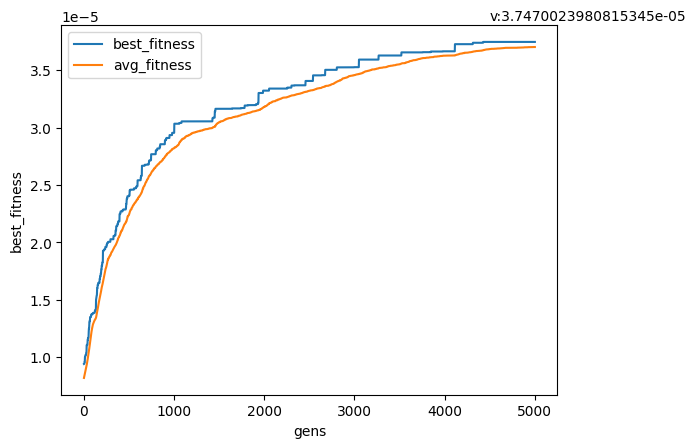

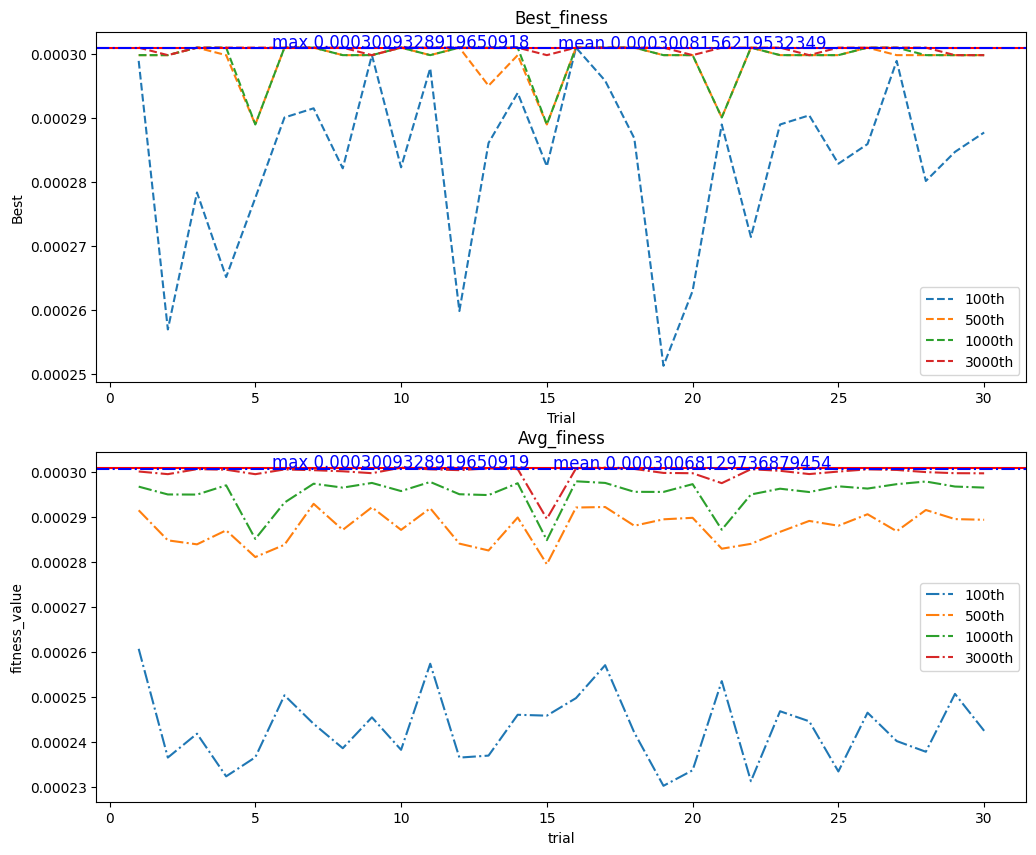

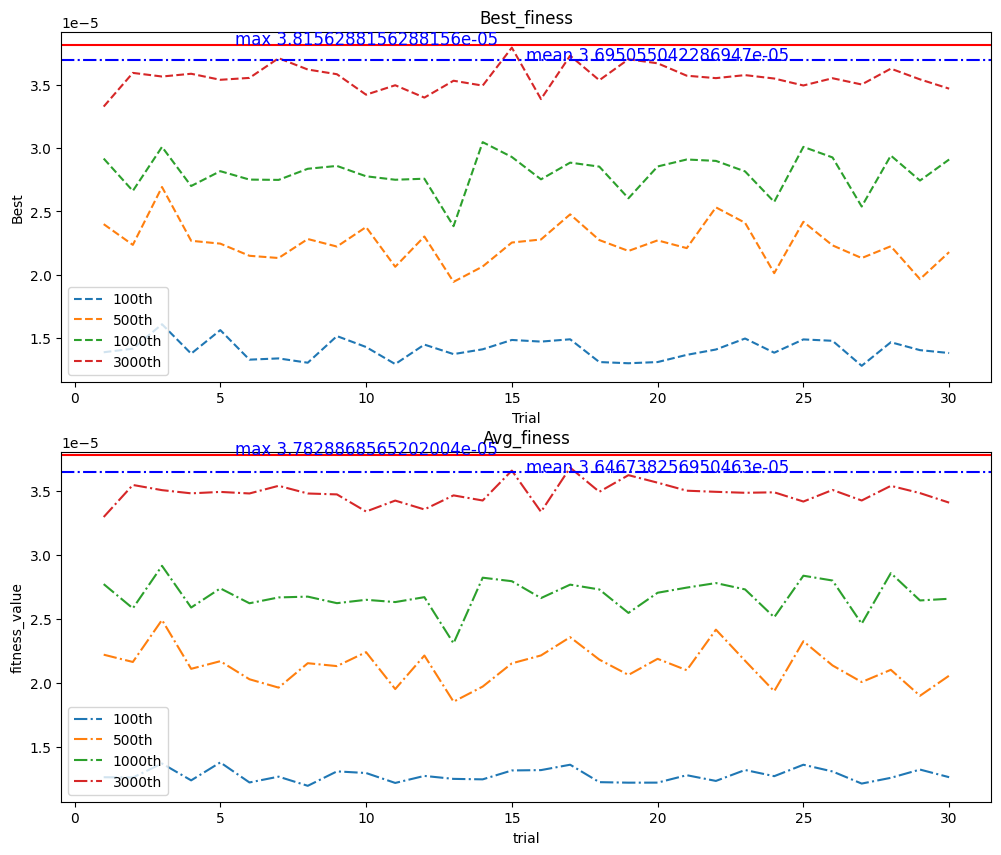

In [ ]:
parameters_data = {
    "max_generations": 5000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res3 = search3k(functions_data,parameters_data,30)
m_plot(res3)

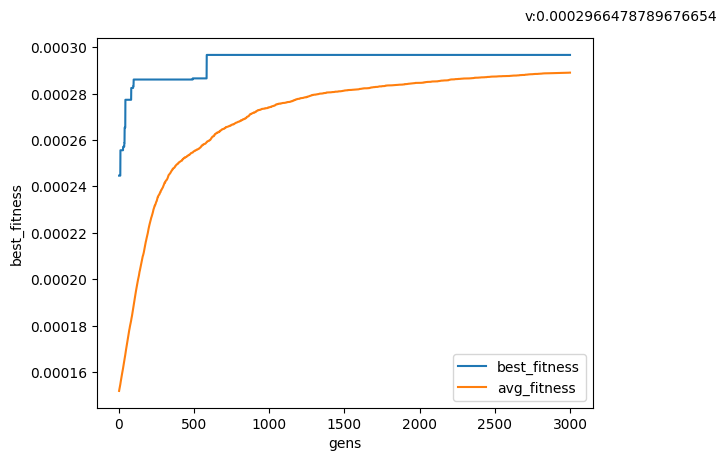

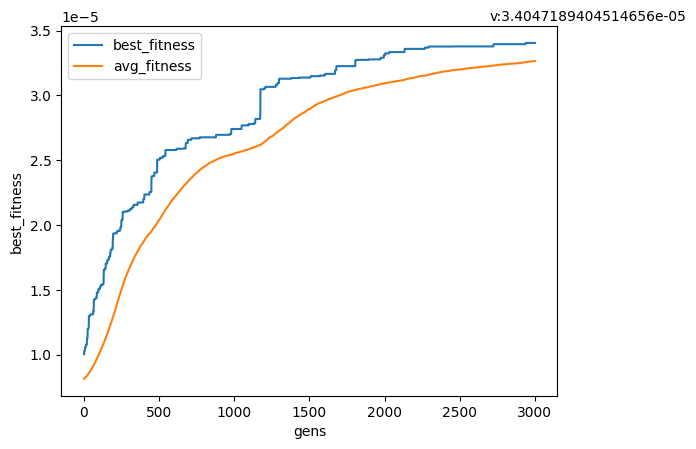

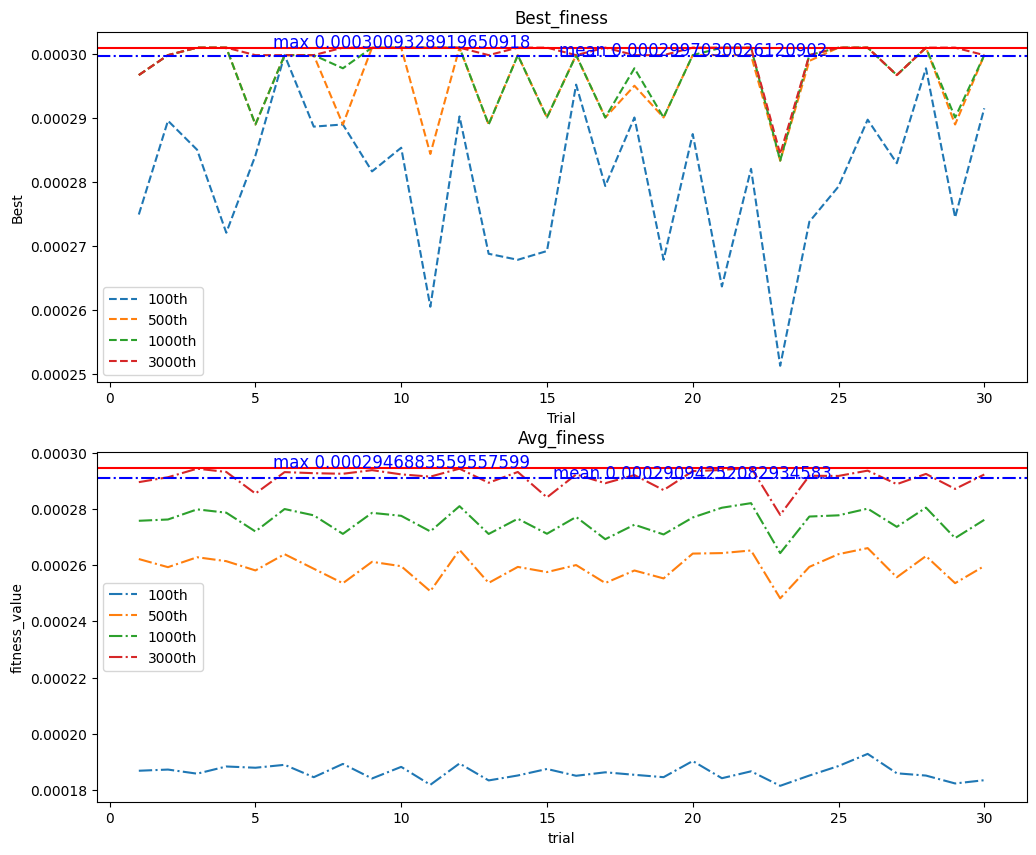

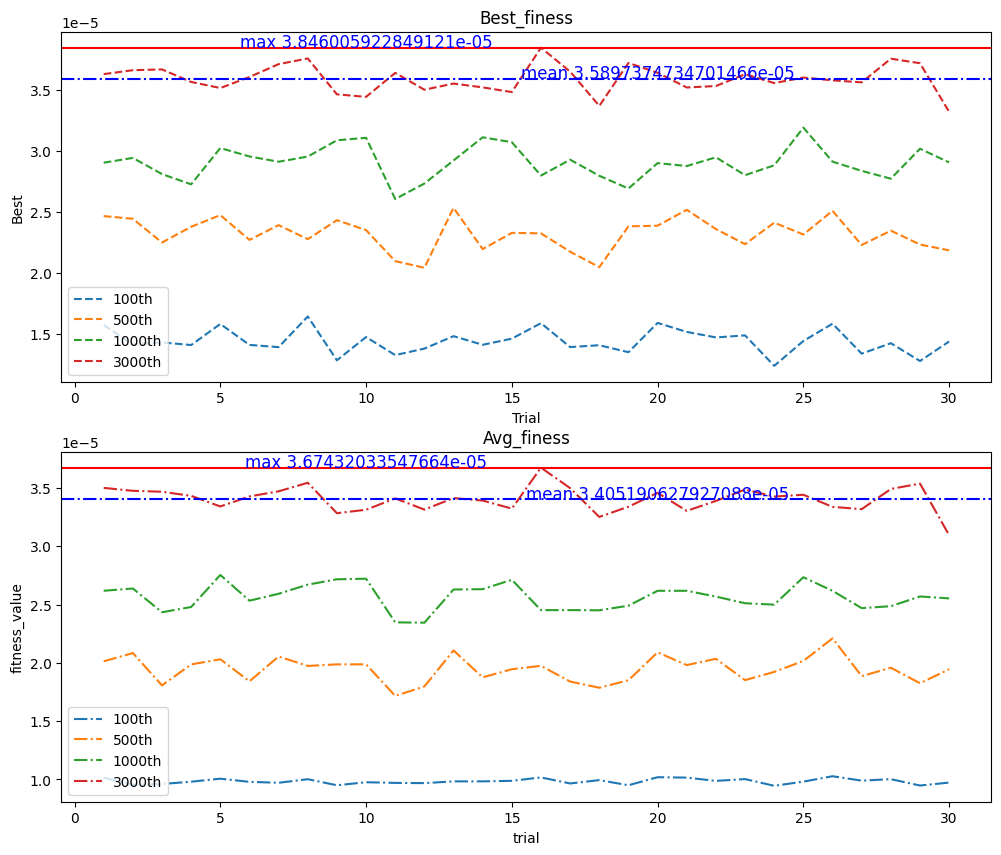

In [ ]:
parameters_data = {
    "max_generations": 3000,
    "population_size": 500,
    "tournament_size": 400,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res4 = search3k(functions_data,parameters_data,20)
m_plot(res4)

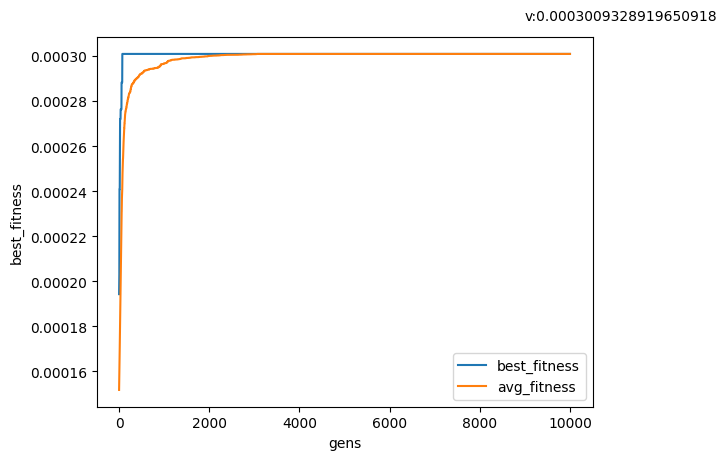

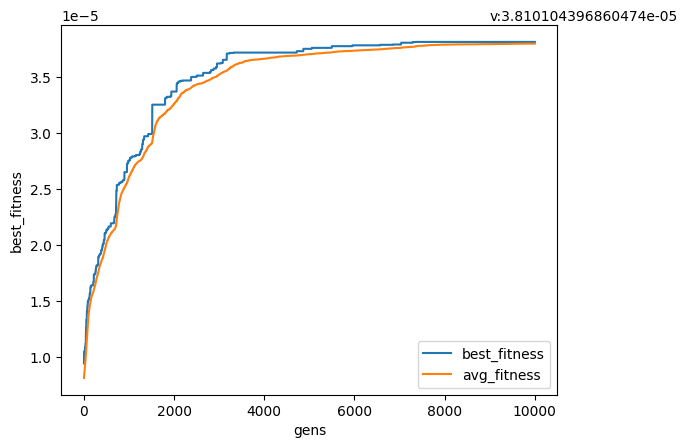

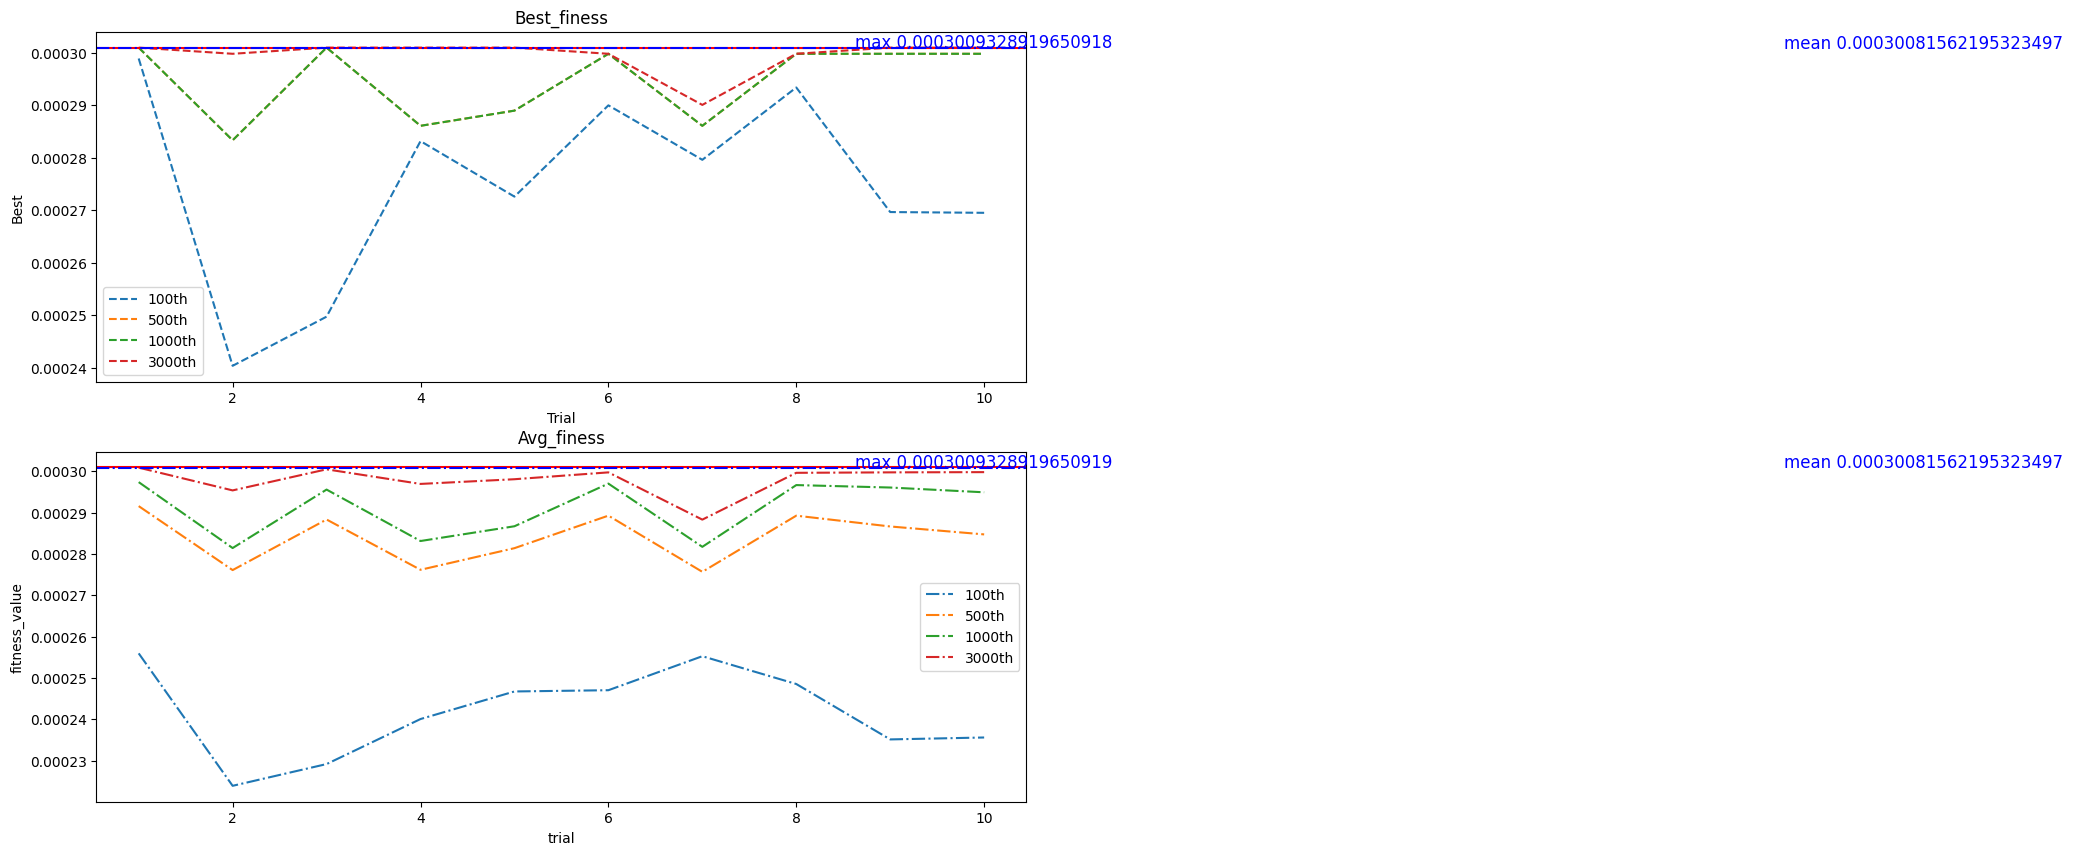

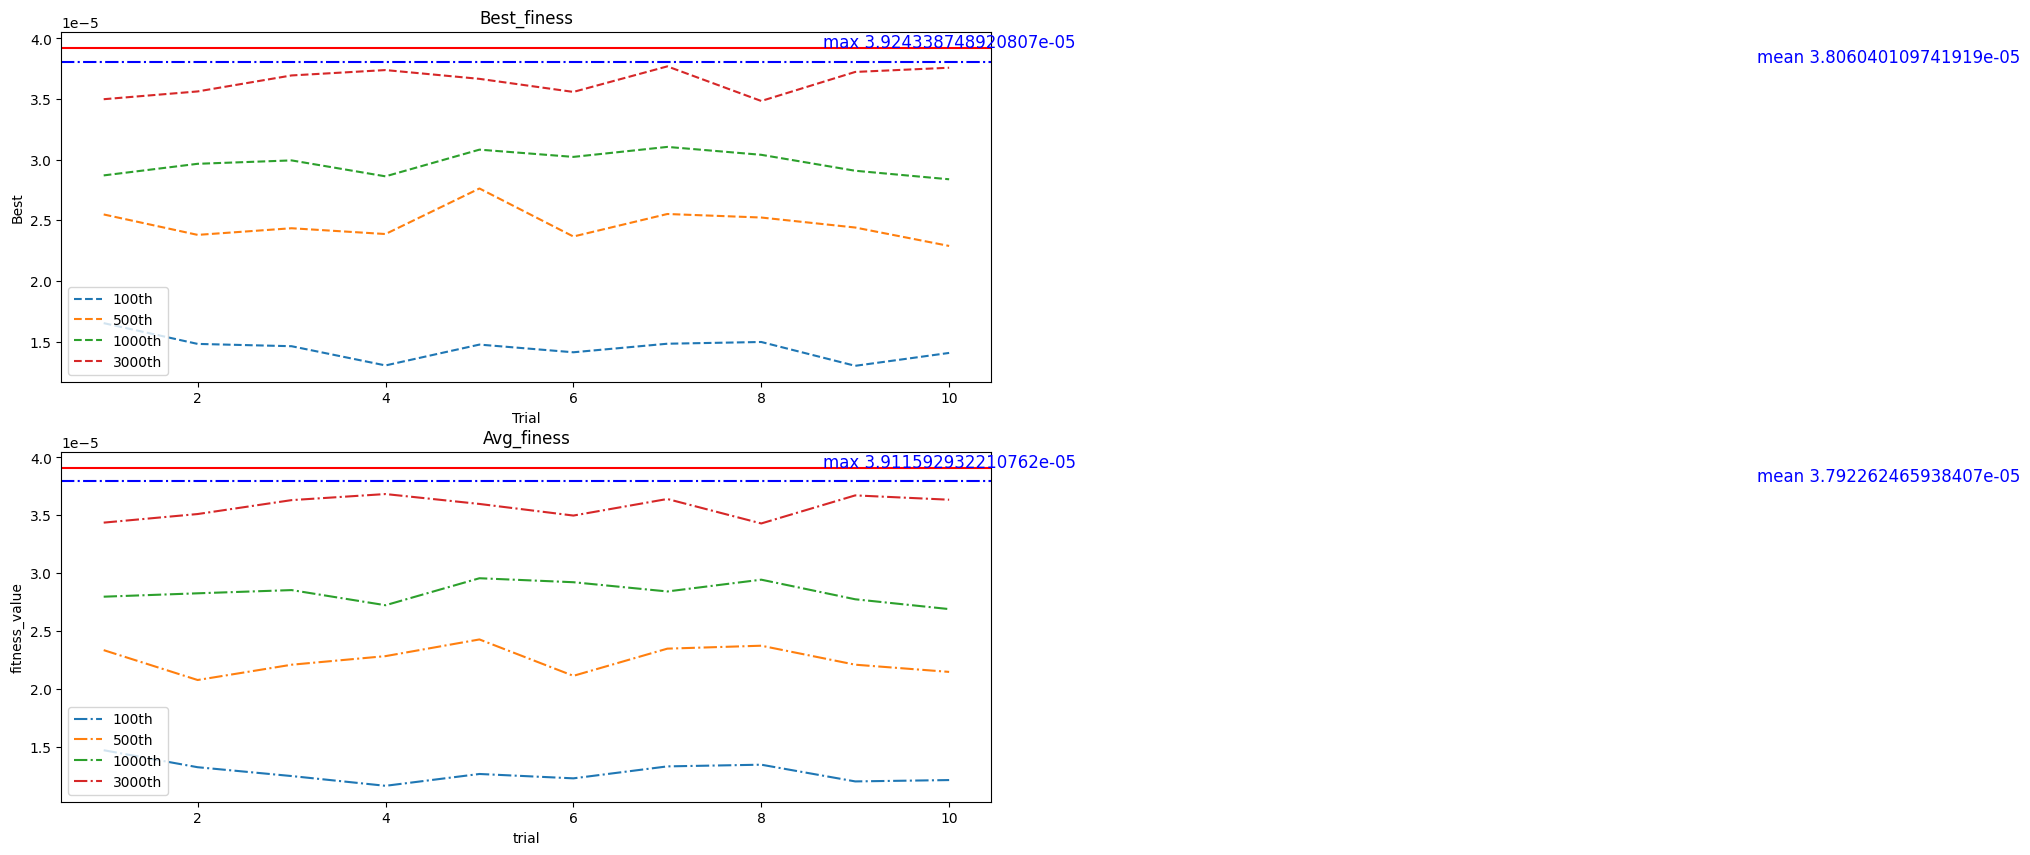

In [ ]:
parameters_data = {
    "max_generations": 10000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res5 = search3k(functions_data,parameters_data,10)
m_plot(res5)

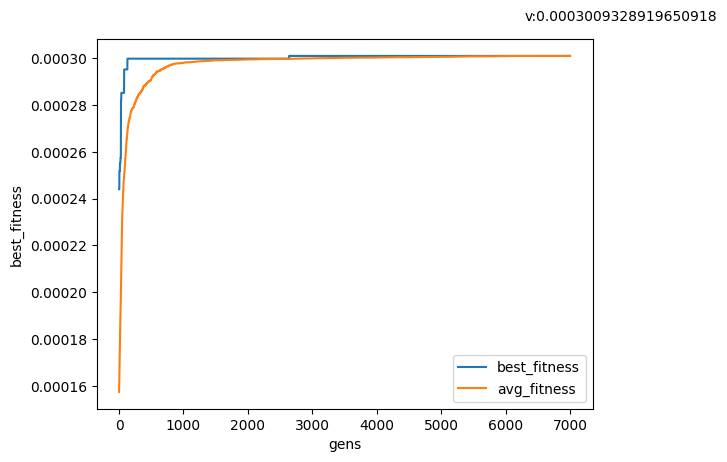

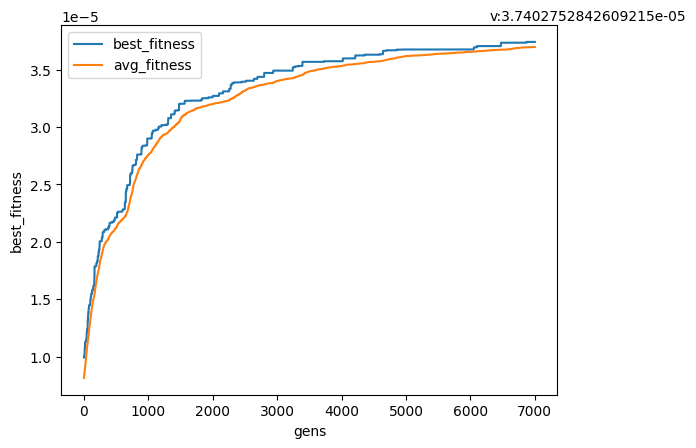

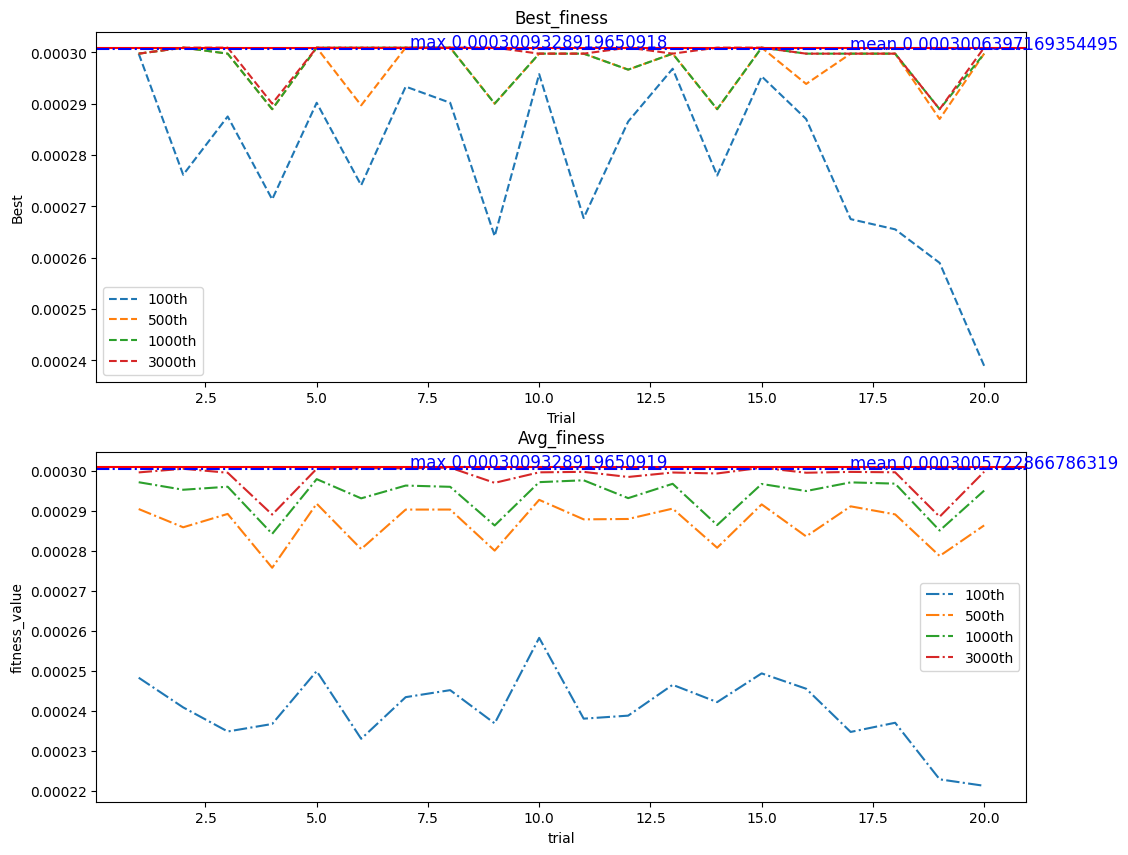

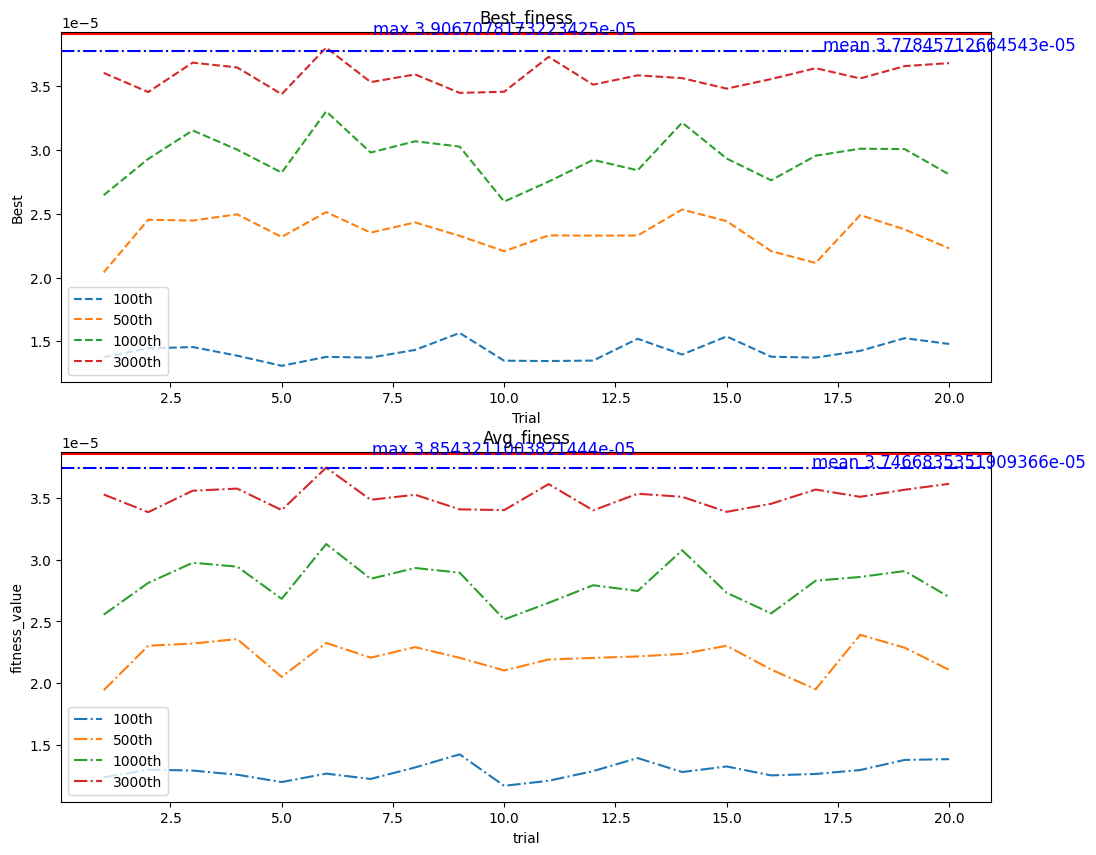

In [ ]:
parameters_data = {
    "max_generations": 7000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res5 = search3k(functions_data,parameters_data,20)
m_plot(res5)

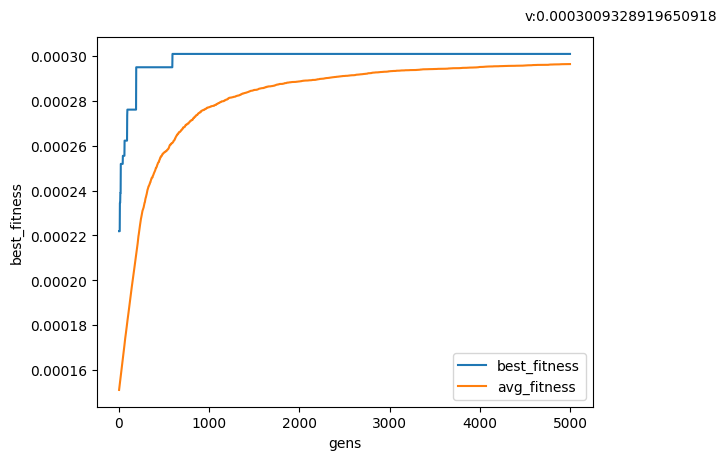

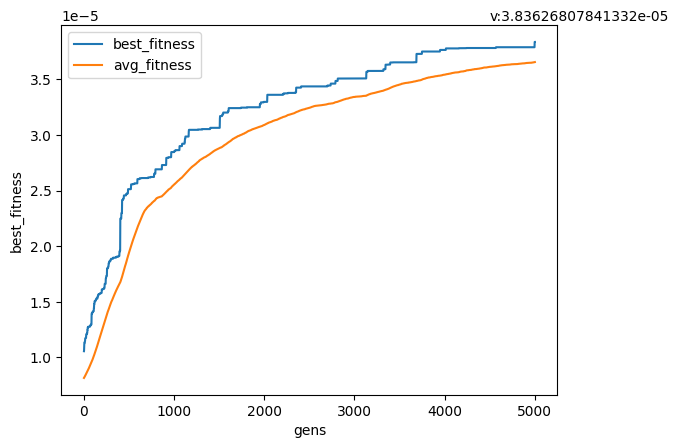

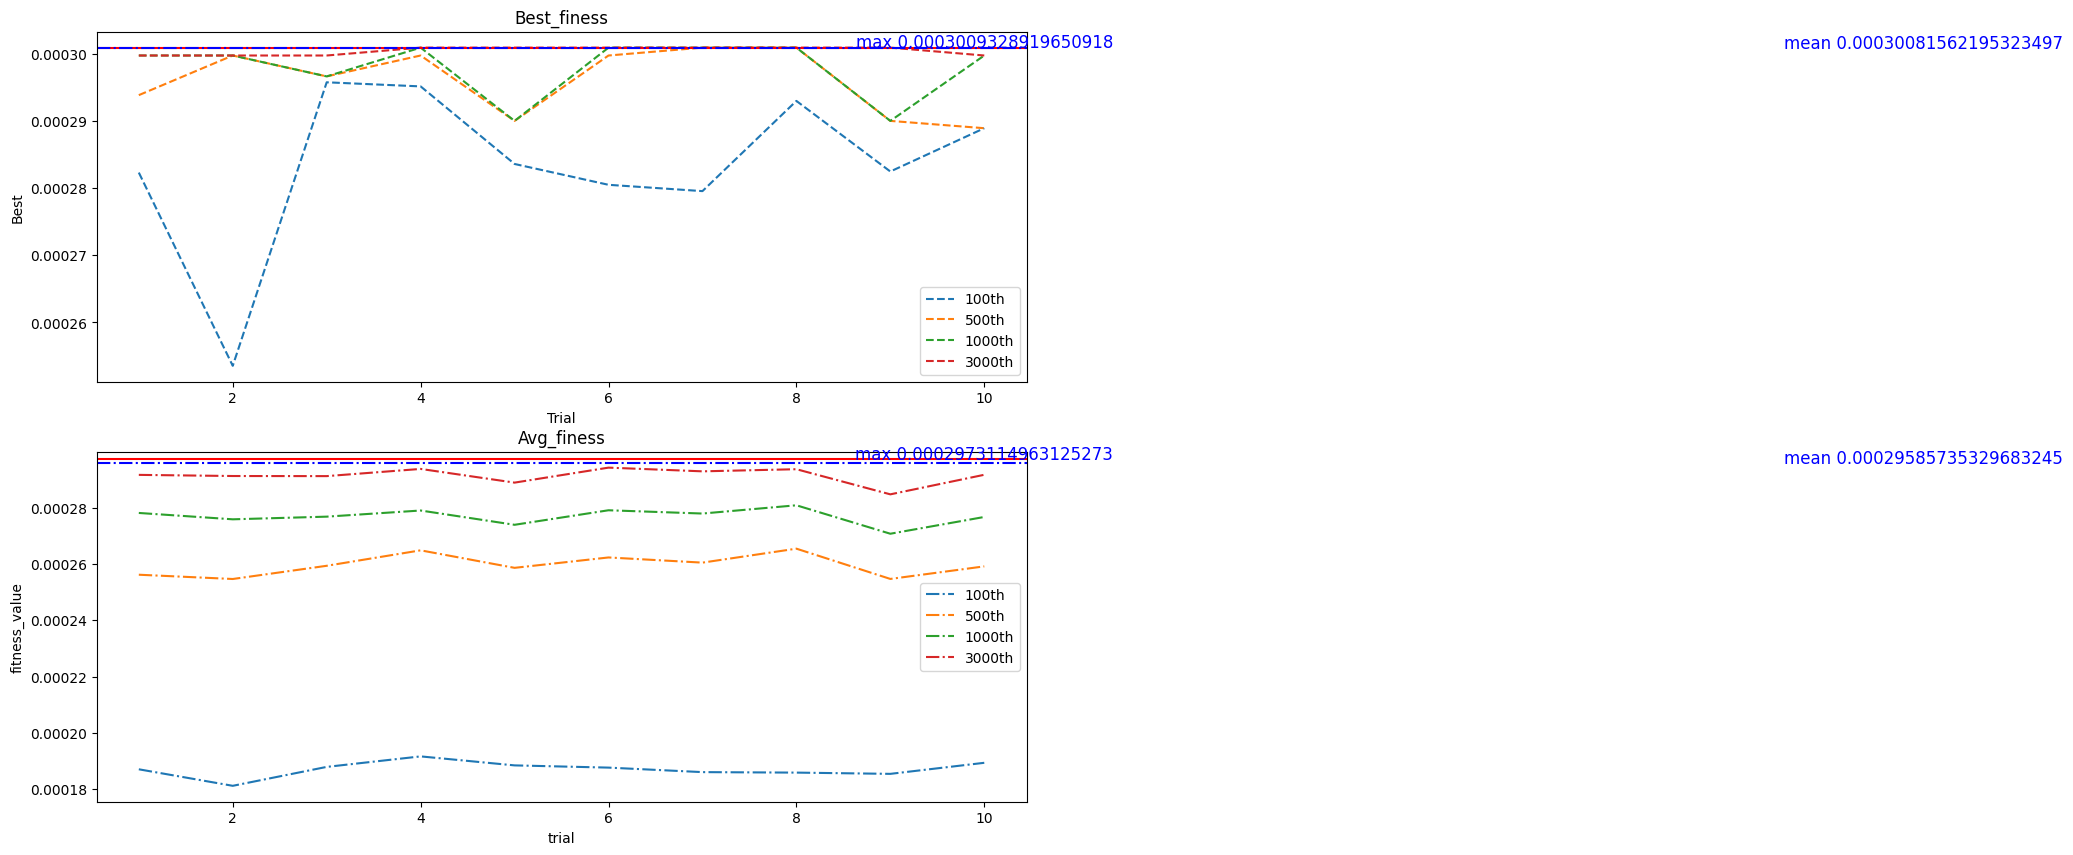

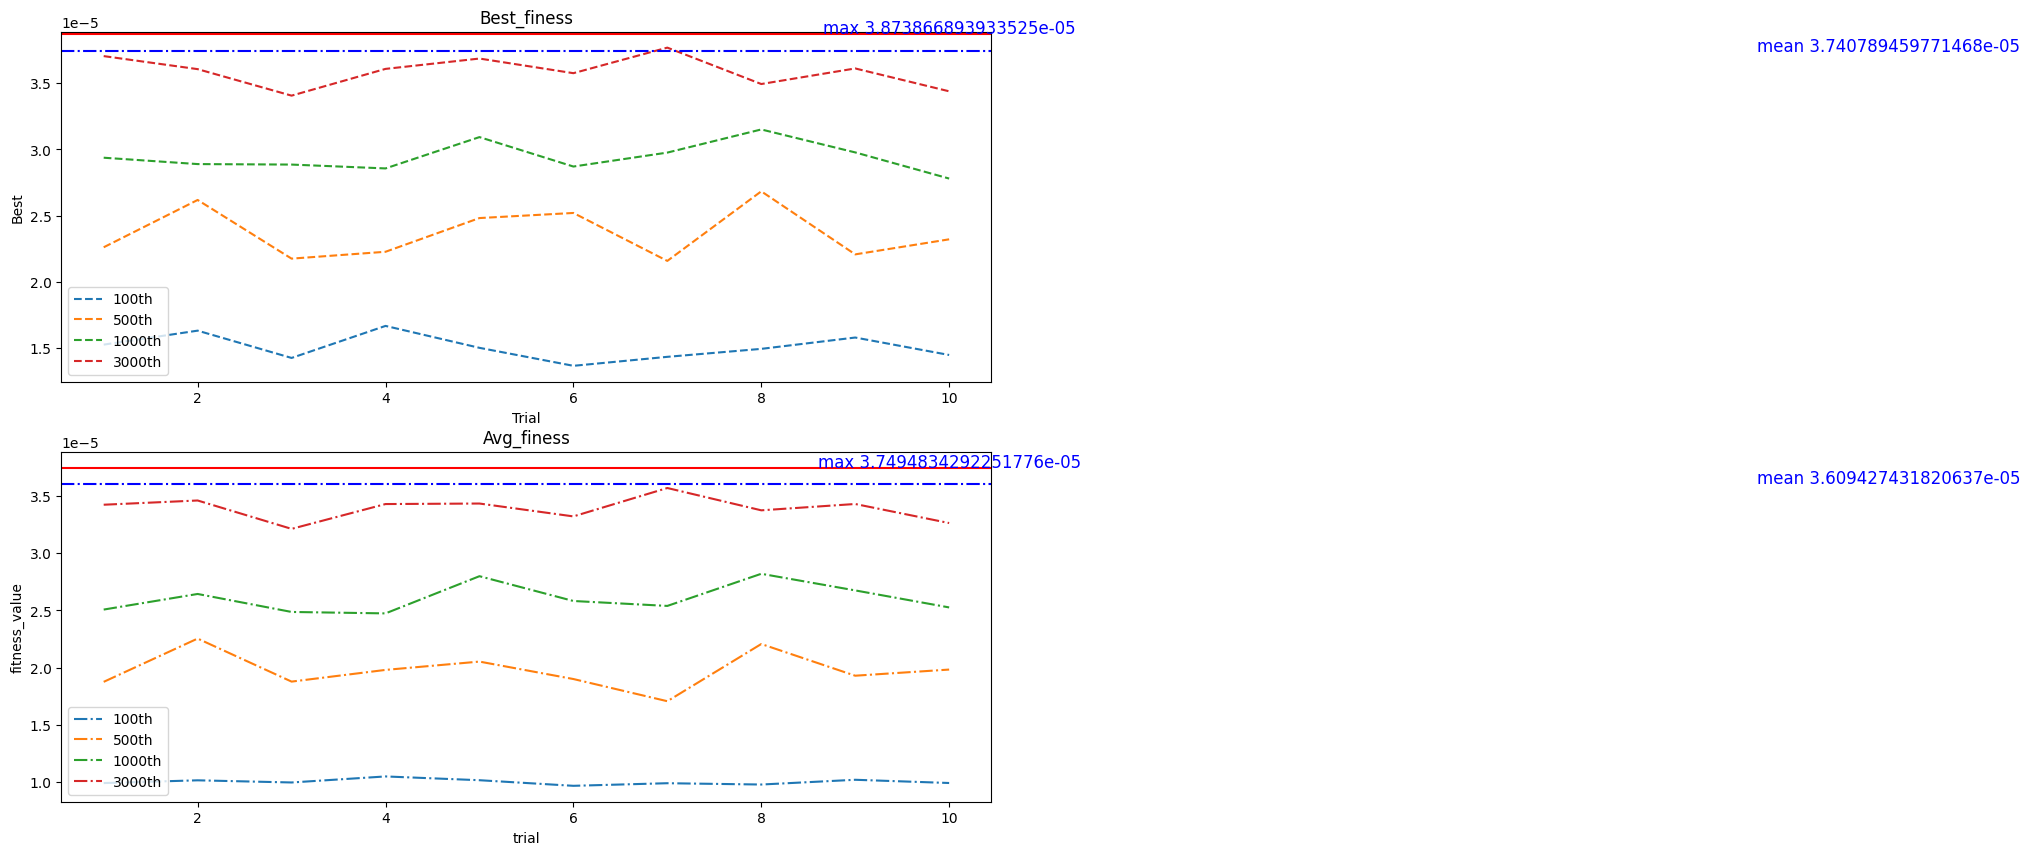

In [ ]:
parameters_data = {
    "max_generations": 5000,
    "population_size": 500,
    "tournament_size": 400,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

res6 = search3k(functions_data,parameters_data,10)
m_plot(res6)

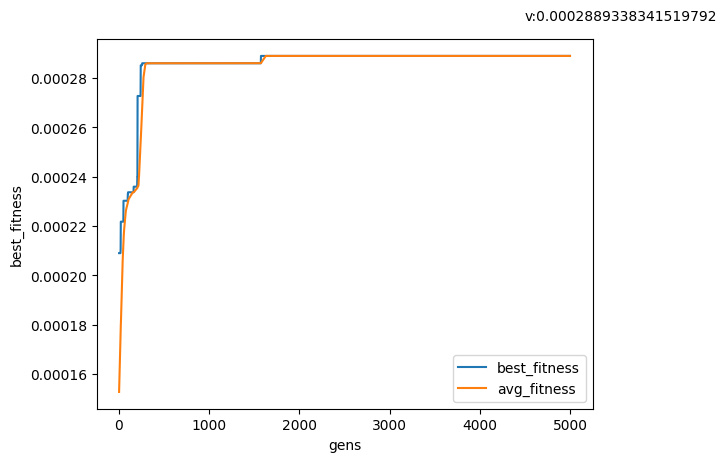

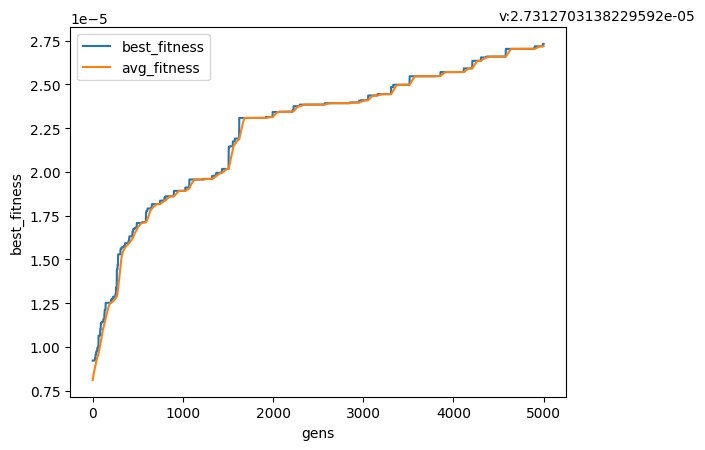

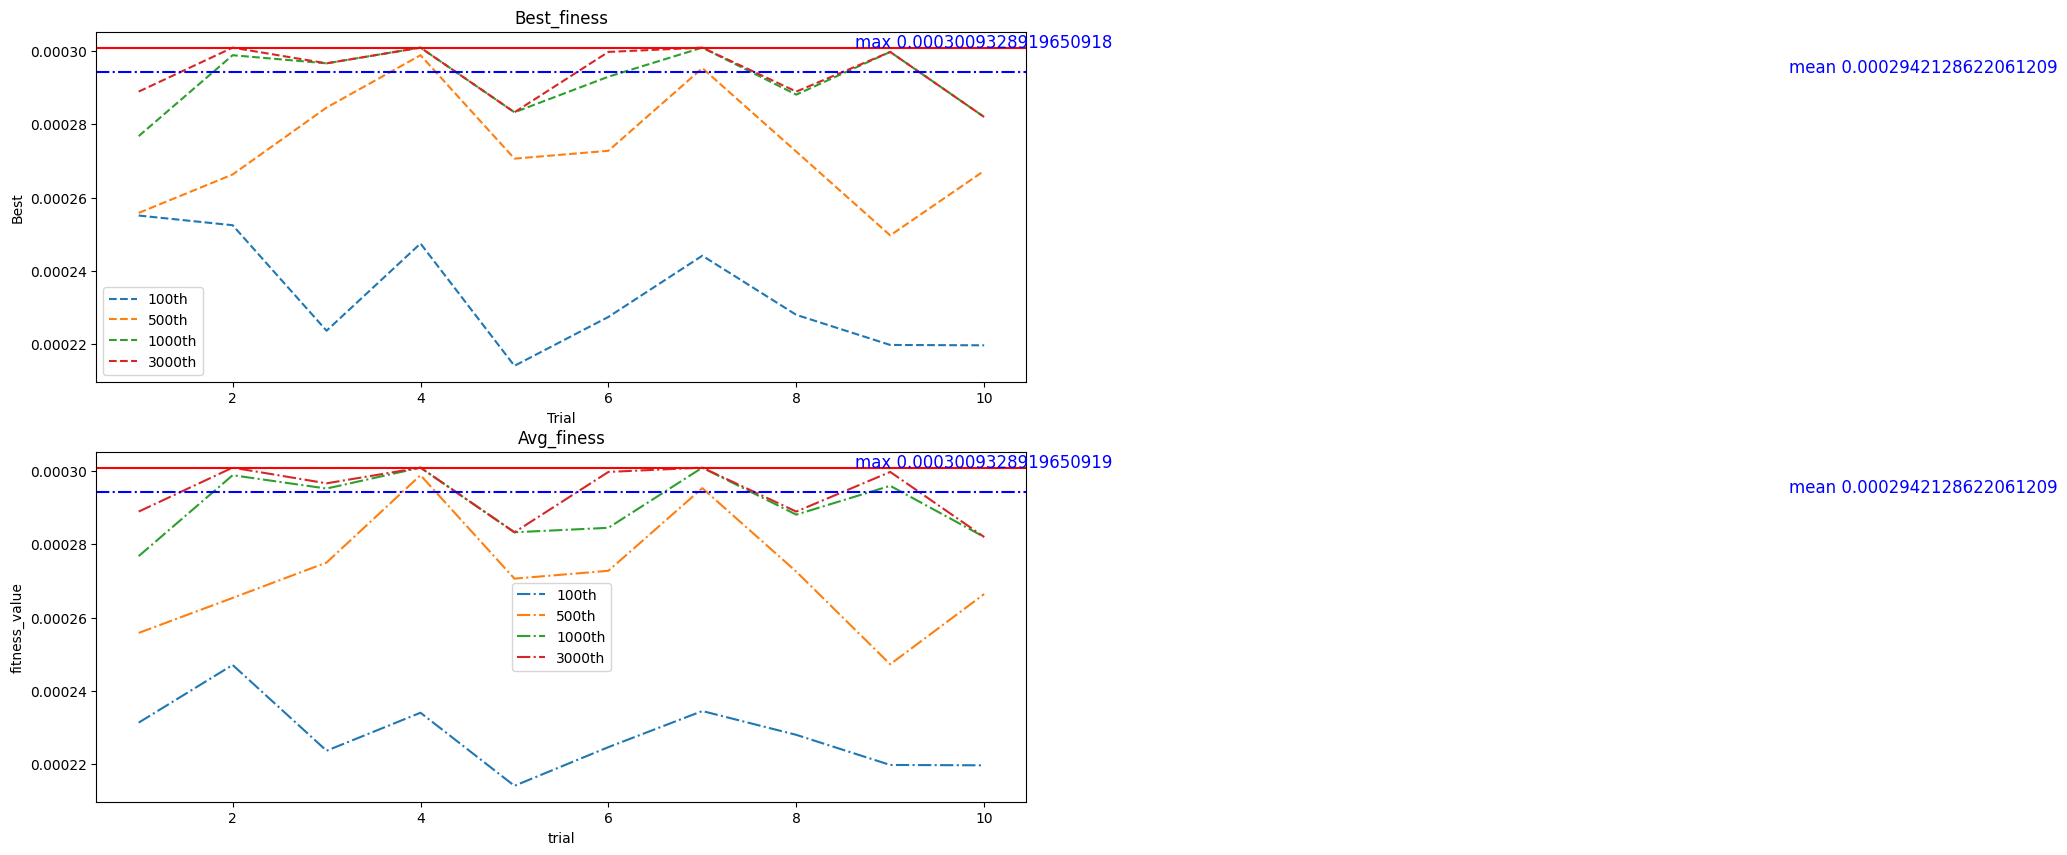

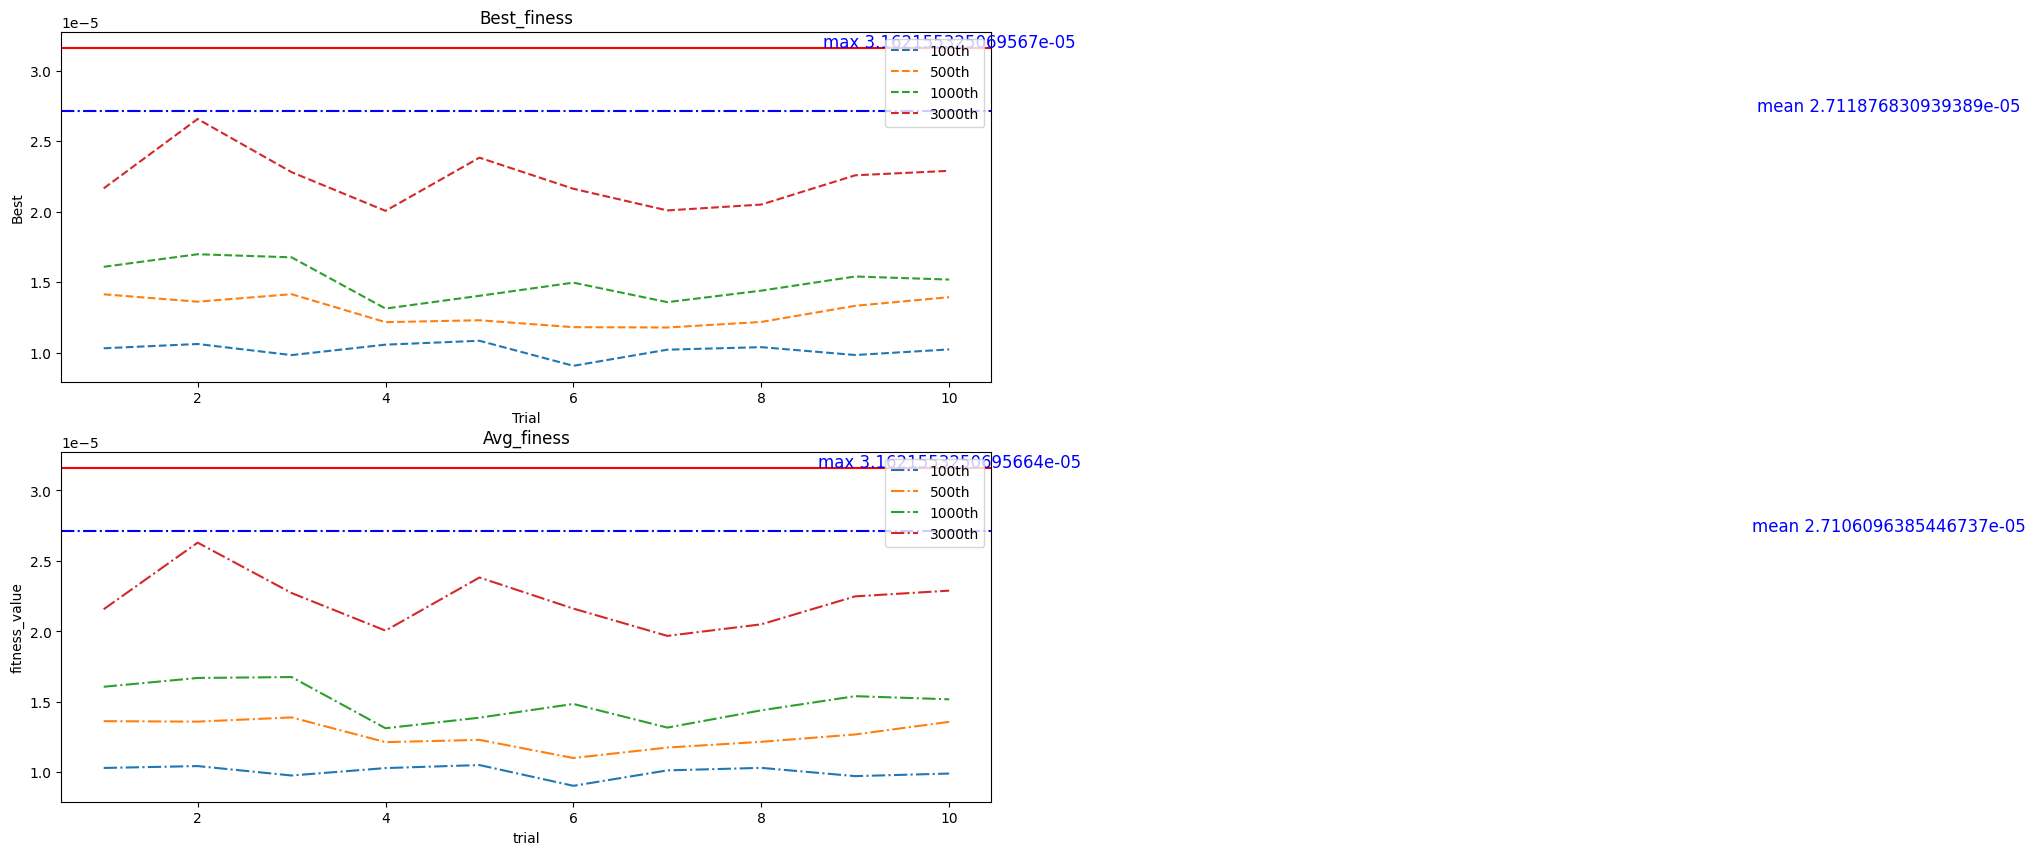

In [ ]:
parameters_data = {
    "max_generations": 5000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 0.1,
}

res7 = search3k(functions_data,parameters_data,10)
m_plot(res7)

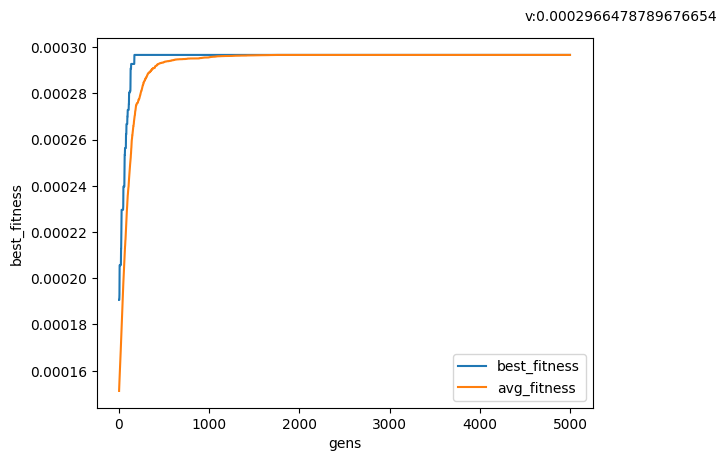

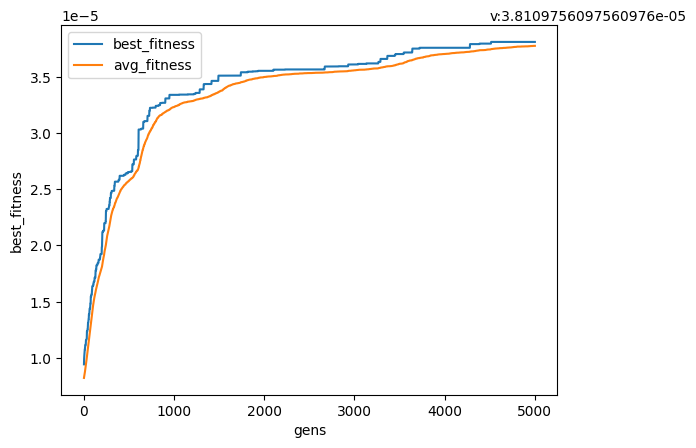

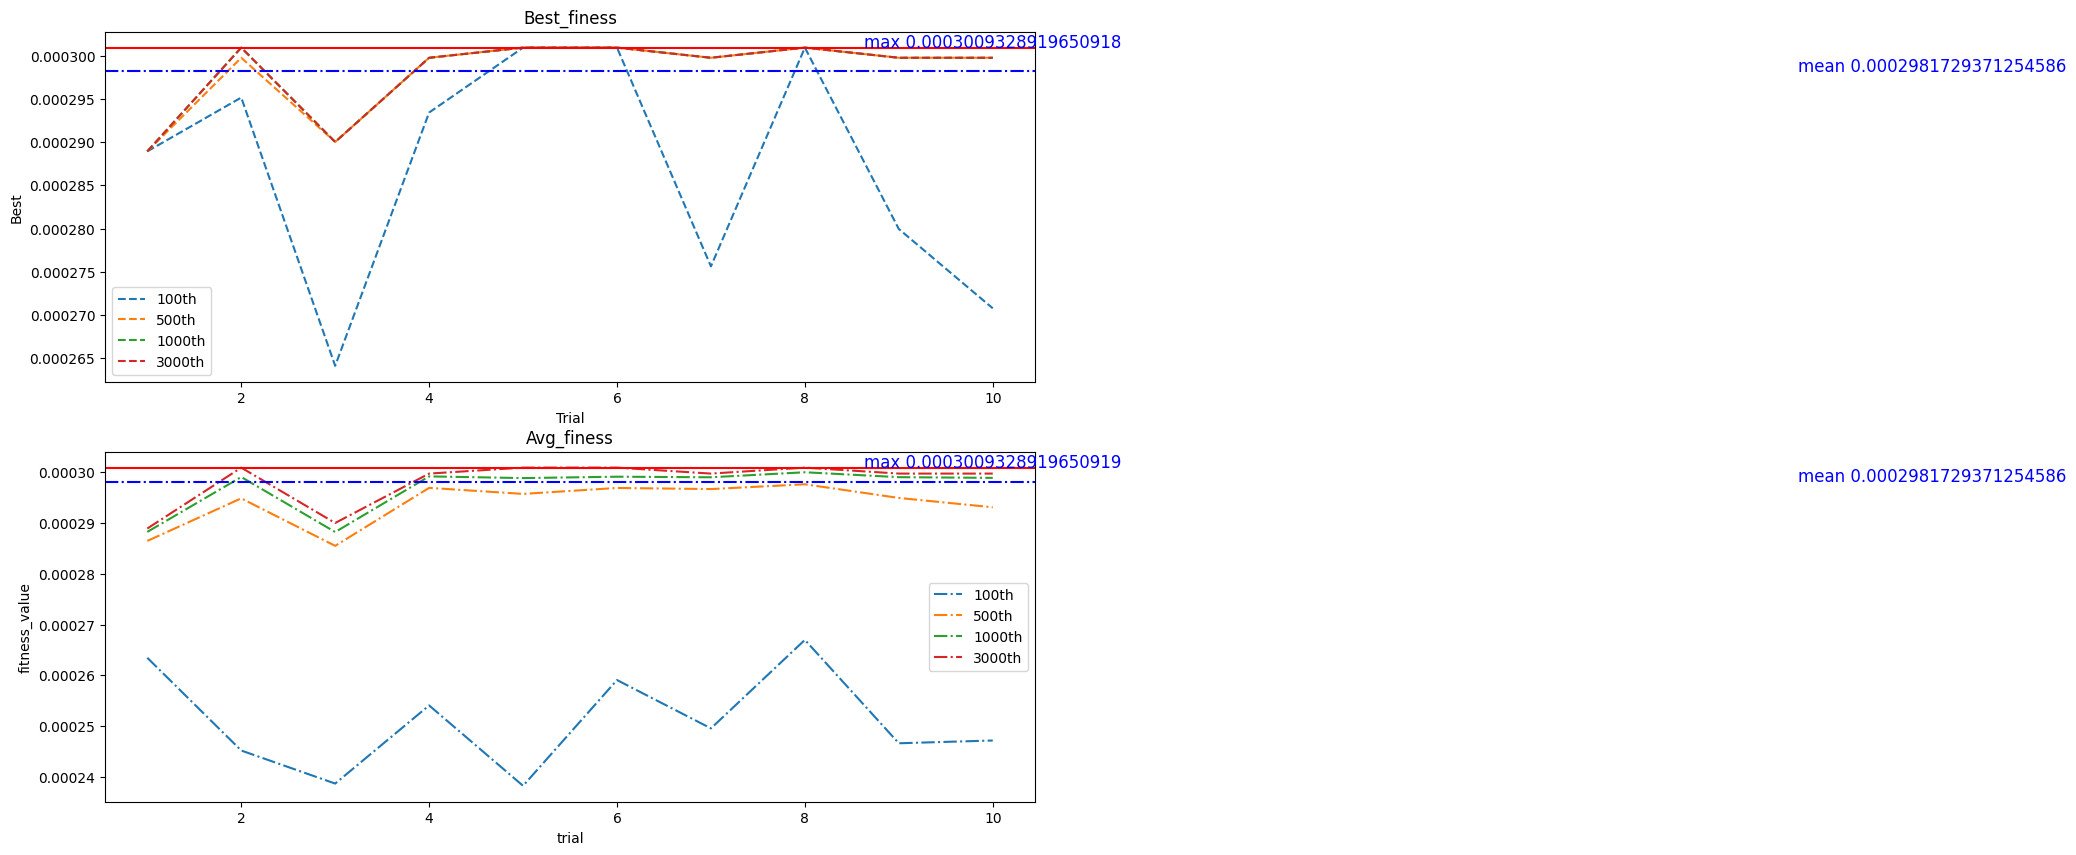

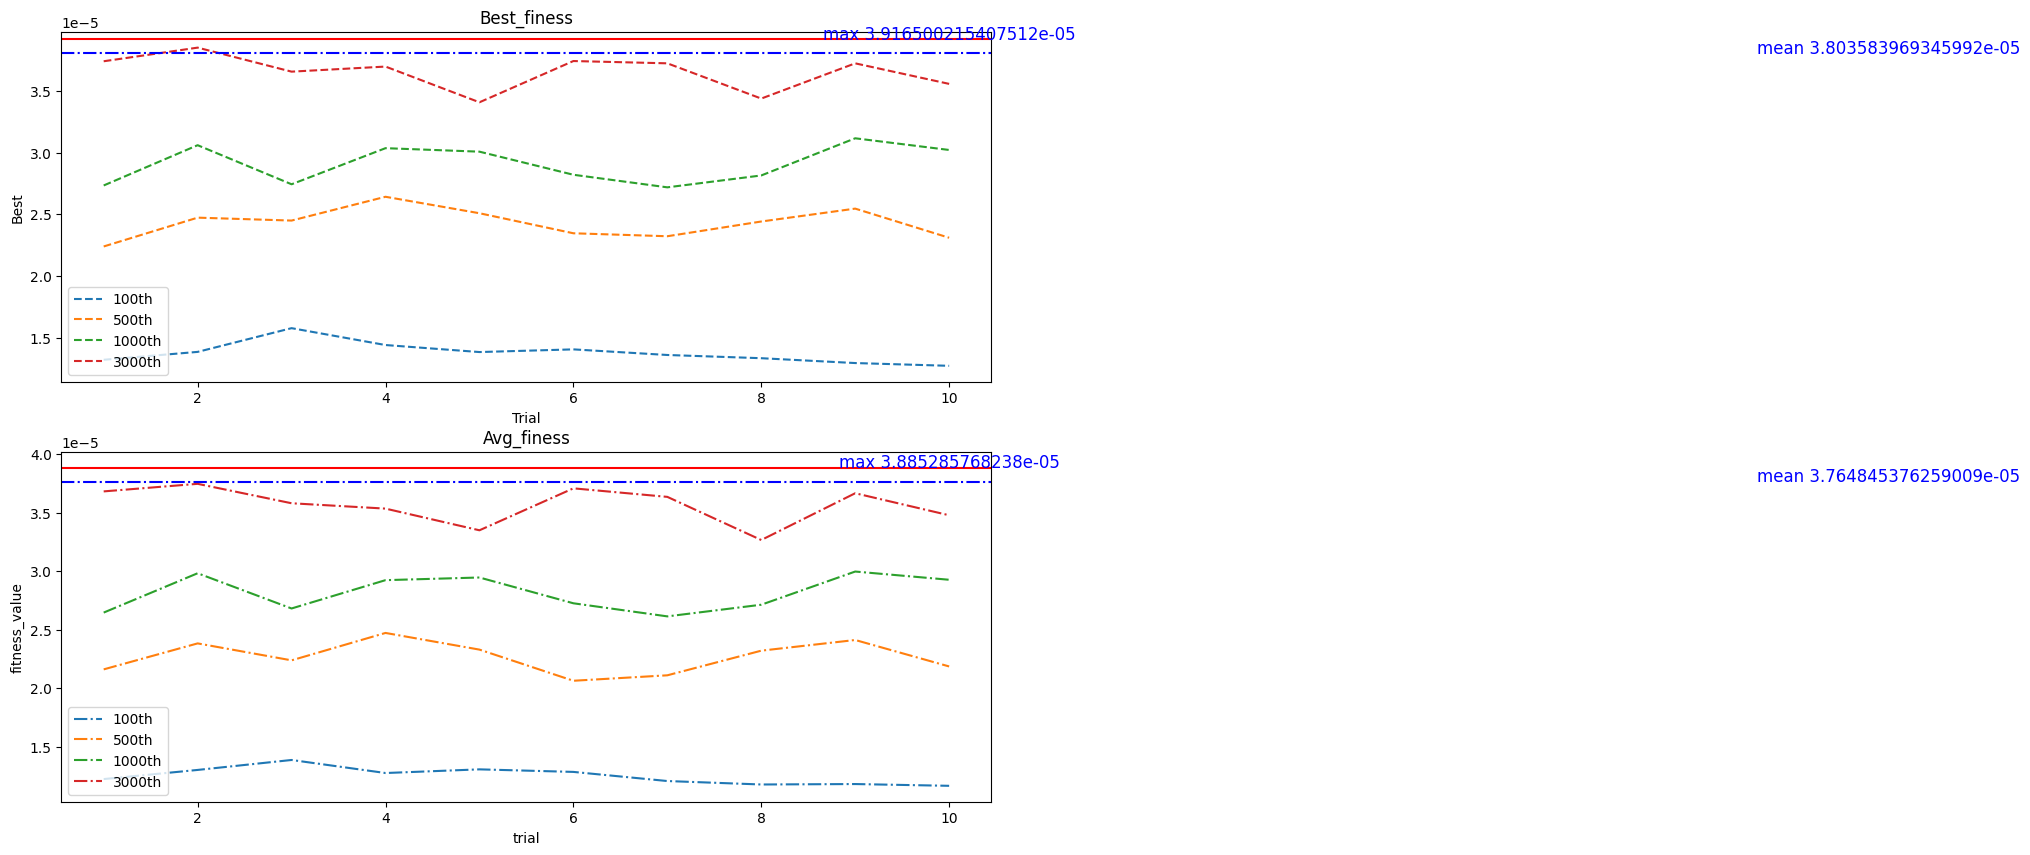

In [ ]:
parameters_data = {
    "max_generations": 5000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 0.1,
    "p_mutate": 1.0,
}

res8 = search3k(functions_data,parameters_data,10)
m_plot(res8)

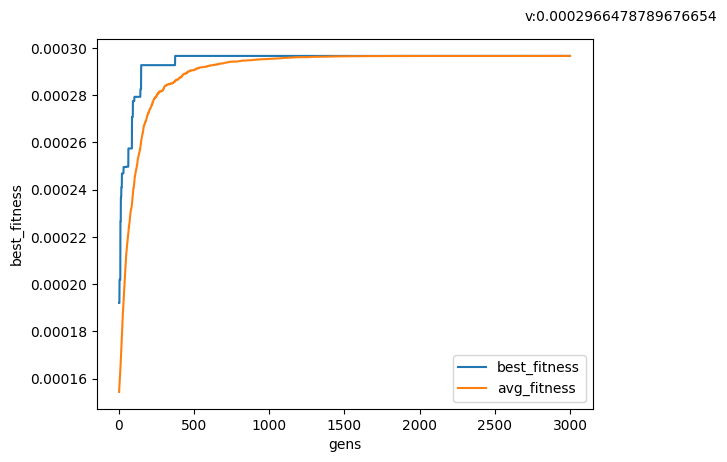

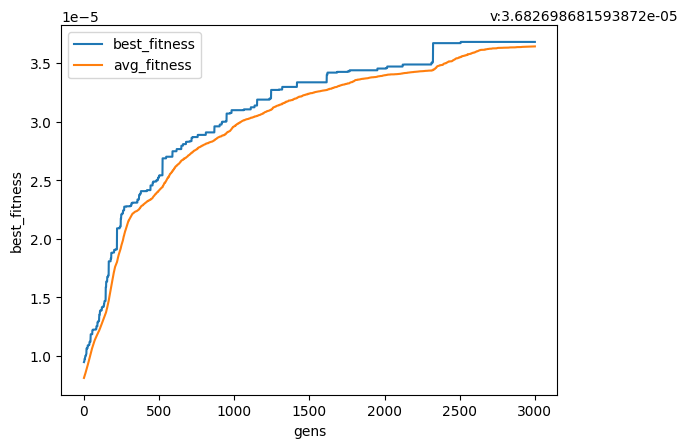

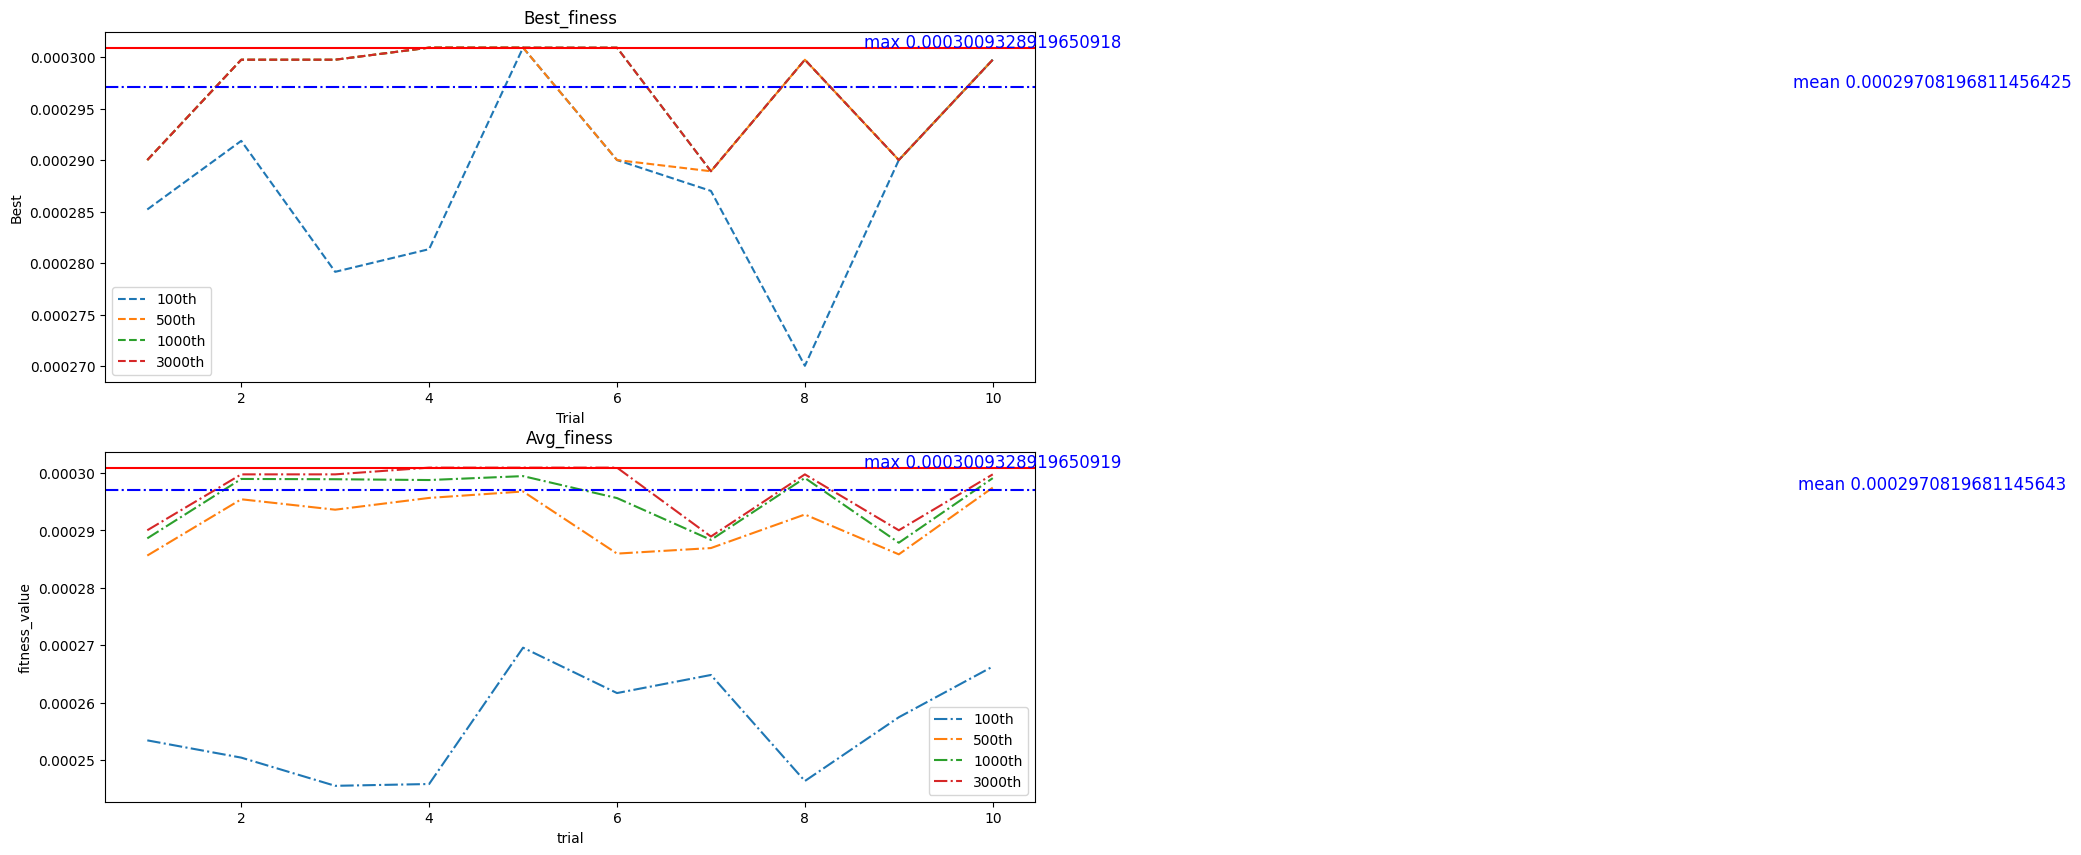

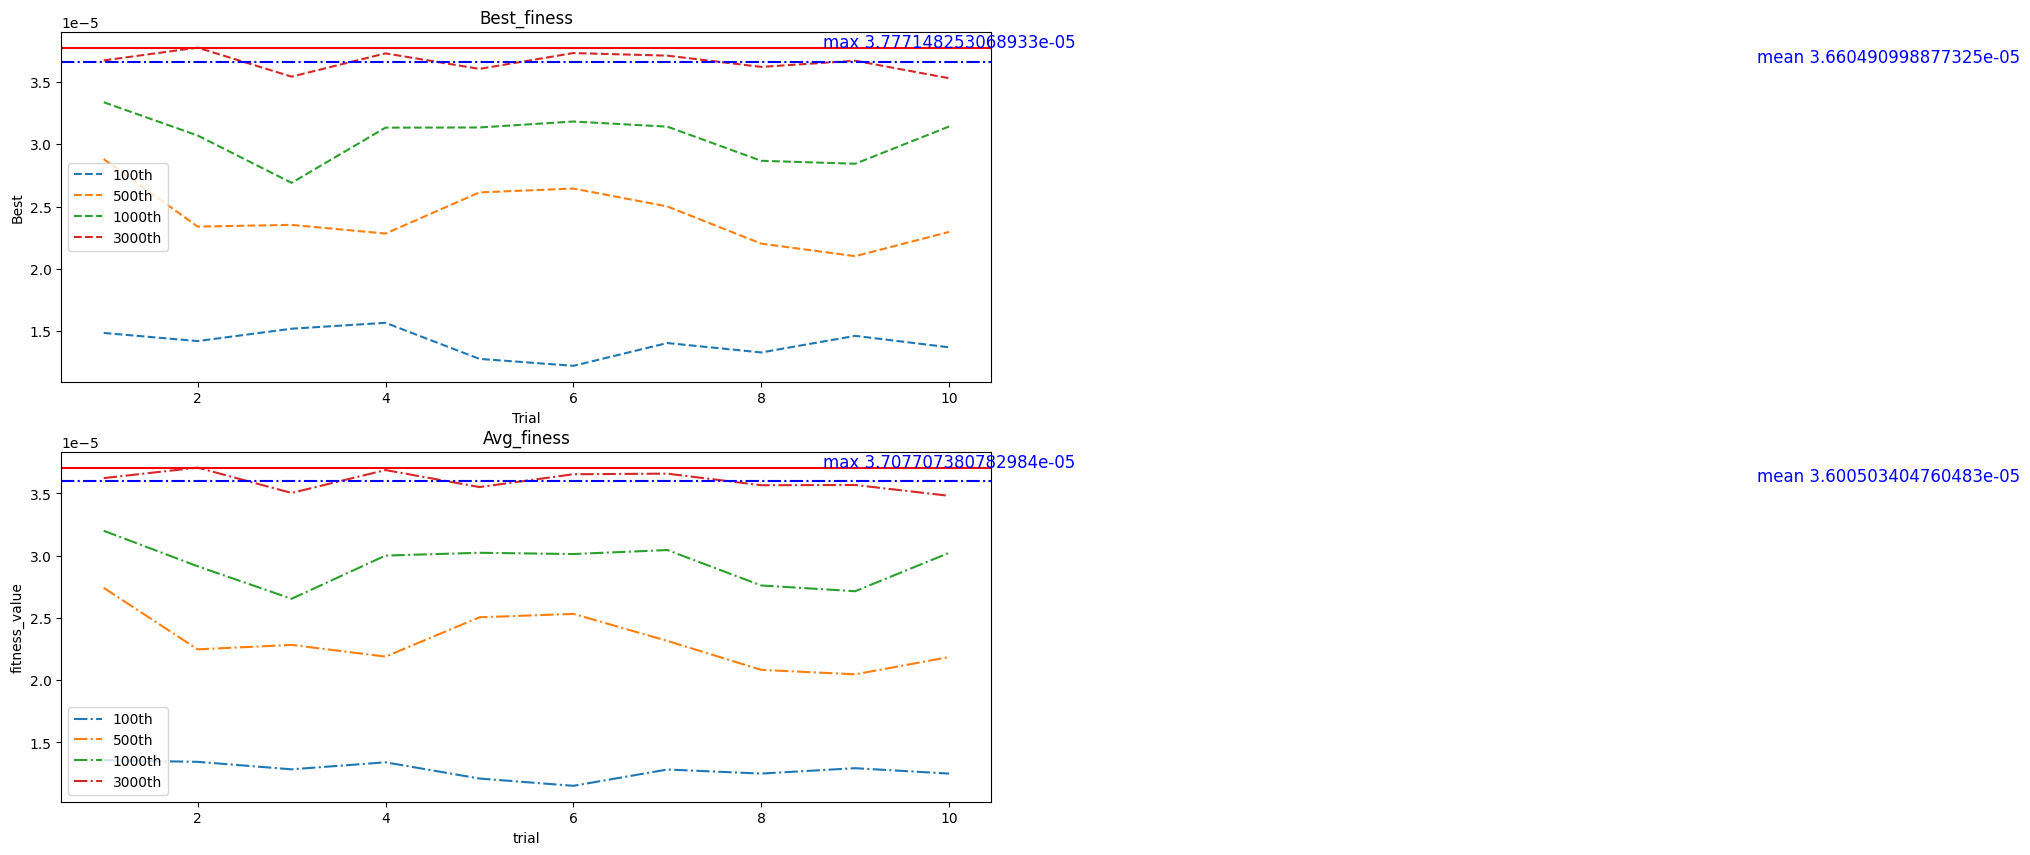

In [ ]:
parameters_data = {
    "max_generations": 3000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 0.1,
    "p_mutate": 1.0,
}

res8 = search3k(functions_data,parameters_data,10)
m_plot(res8)

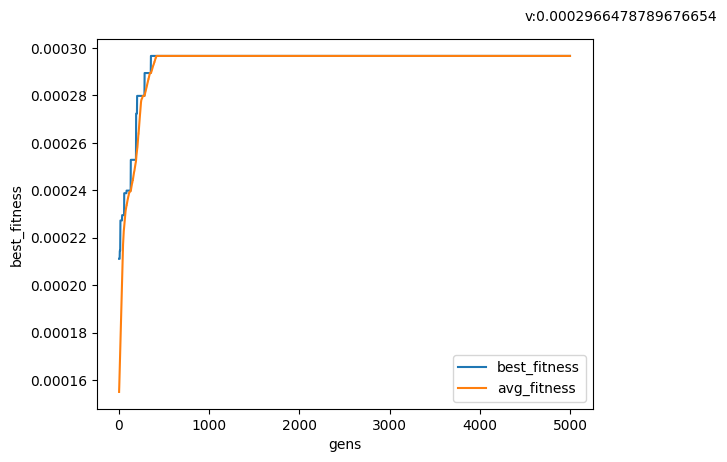

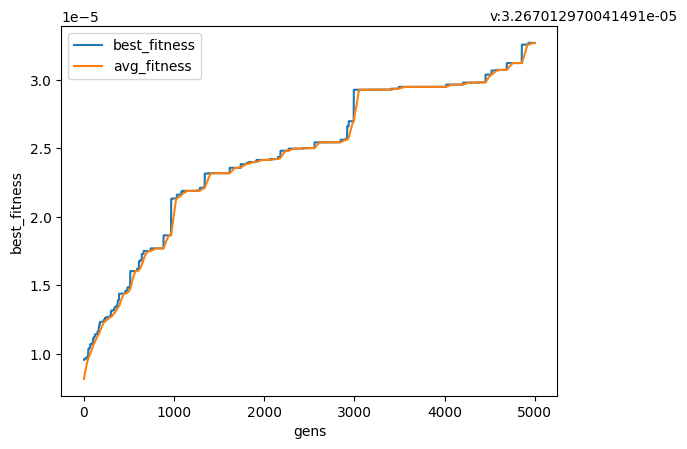

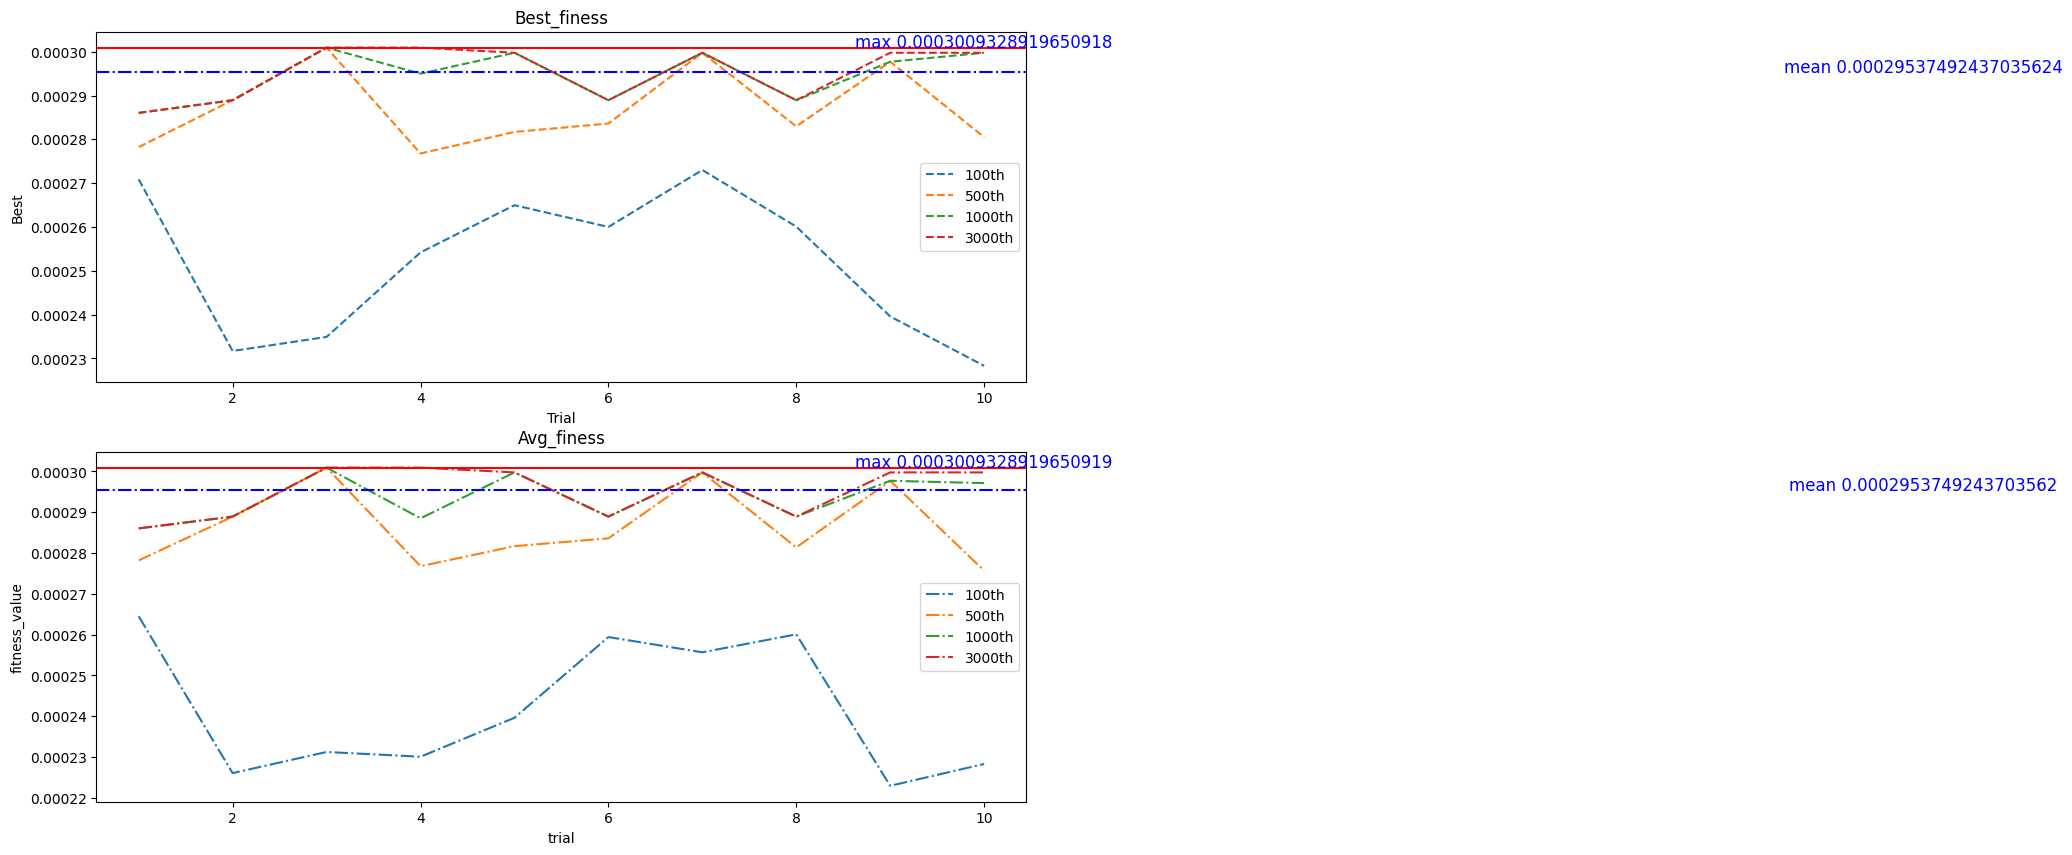

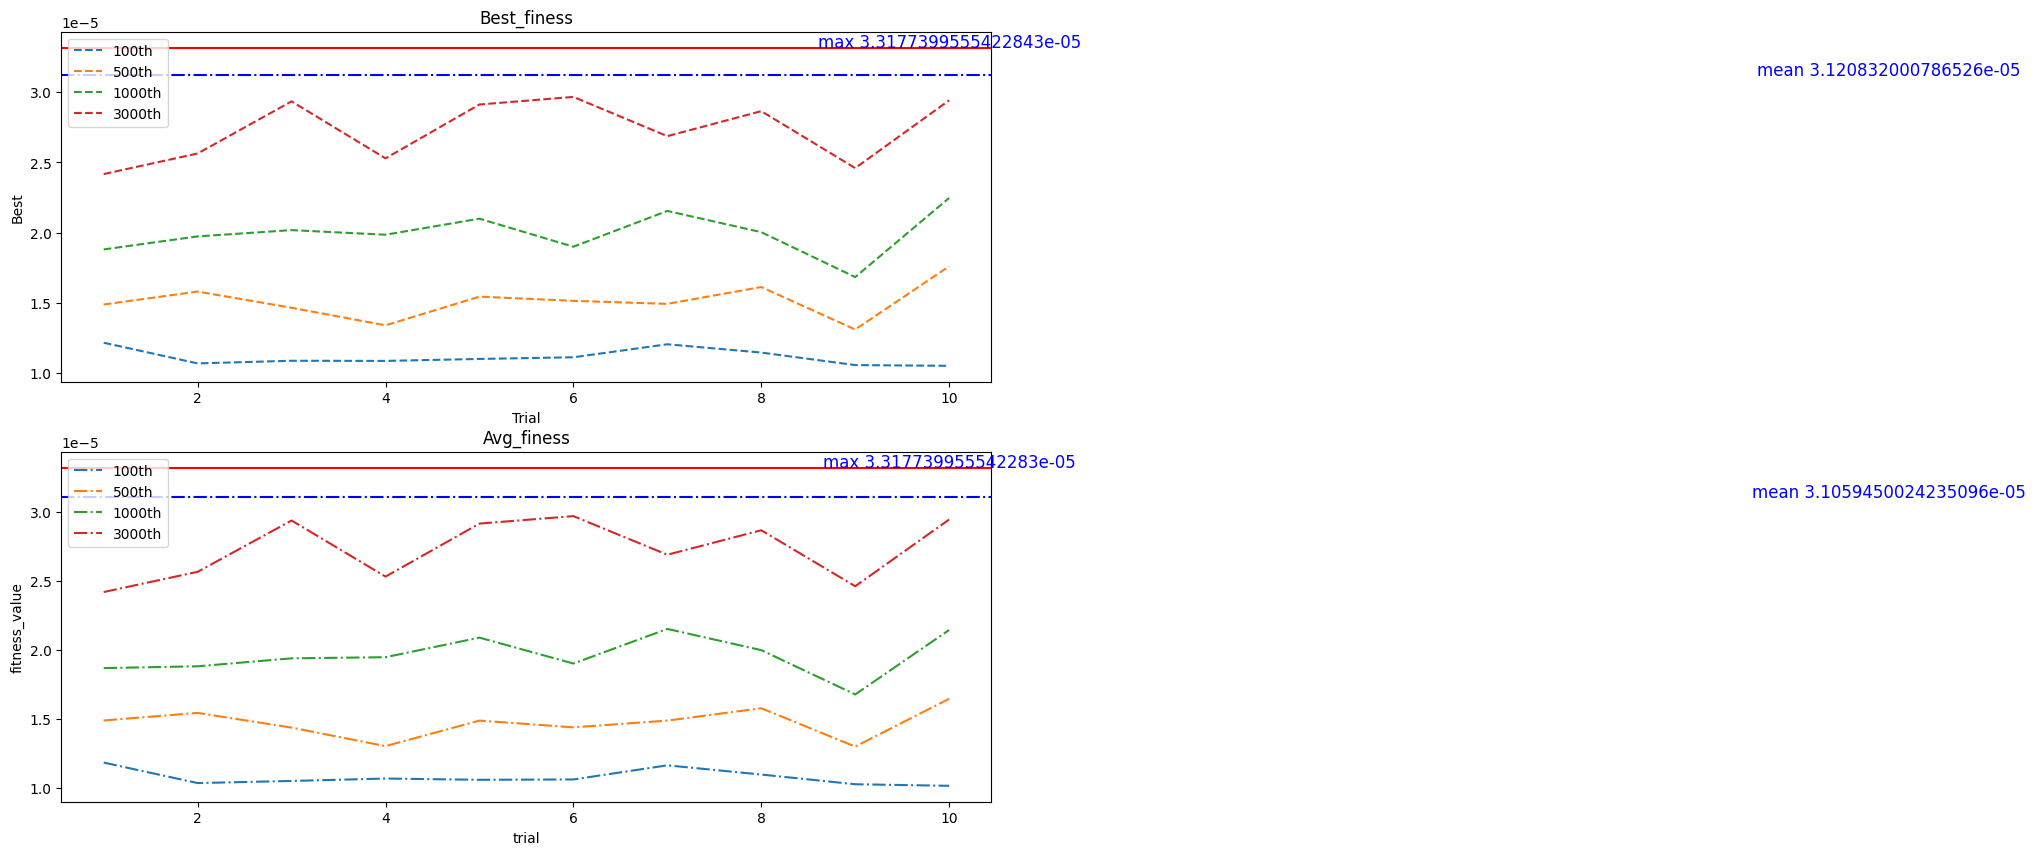

In [ ]:
parameters_data = {
    "max_generations": 5000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": .9,
    "p_mutate": .2,
}

res5 = search3k(functions_data,parameters_data,10)
m_plot(res5)